In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def compute_new_connectivity_matrix(data, column_name):
    """Compute the connectivity matrix for the given data and column using the new approach."""
    # Create an empty matrix with zeros
    matrix = pd.DataFrame(0, index=newlabels_corrected.keys(), columns=newlabels_corrected.keys(), dtype=int)

    # For each unique item in the specified column (e.g., ordered_pair or ordered_triplet)
    for item in data[column_name].unique():
        # Filter data for the current item
        filtered_data = data[data[column_name] == item]

        # Count occurrences of each parent
        parent_counts = filtered_data['parent_network'].value_counts()

        # Update the matrix with the product of occurrences of pairs of different parents
        for i in parent_counts.index:
            for j in parent_counts.index:
                if i != j:
                    matrix.at[i, j] += parent_counts[i] * parent_counts[j]

    return matrix


In [ ]:
newlabels_corrected = {
    "DMN": 0, "ATTENTION": 1, "MOTOR": 2, "VISUAL": 3, "EXECUTIVE": 4,
    "SENSORY": 5, "SALIENCE": 6, "AUDITORY": 7, "COGNITIVE": 8, "BASALGANGLIA": 9,
    "LANG": 10, "CEREBELLAR": 11, "HYPOTHALAMUS": 12, "THALAMUS": 13, "OTHERS": 14
}
#The 15 label names are:

(52799, 11)
(17599, 11)


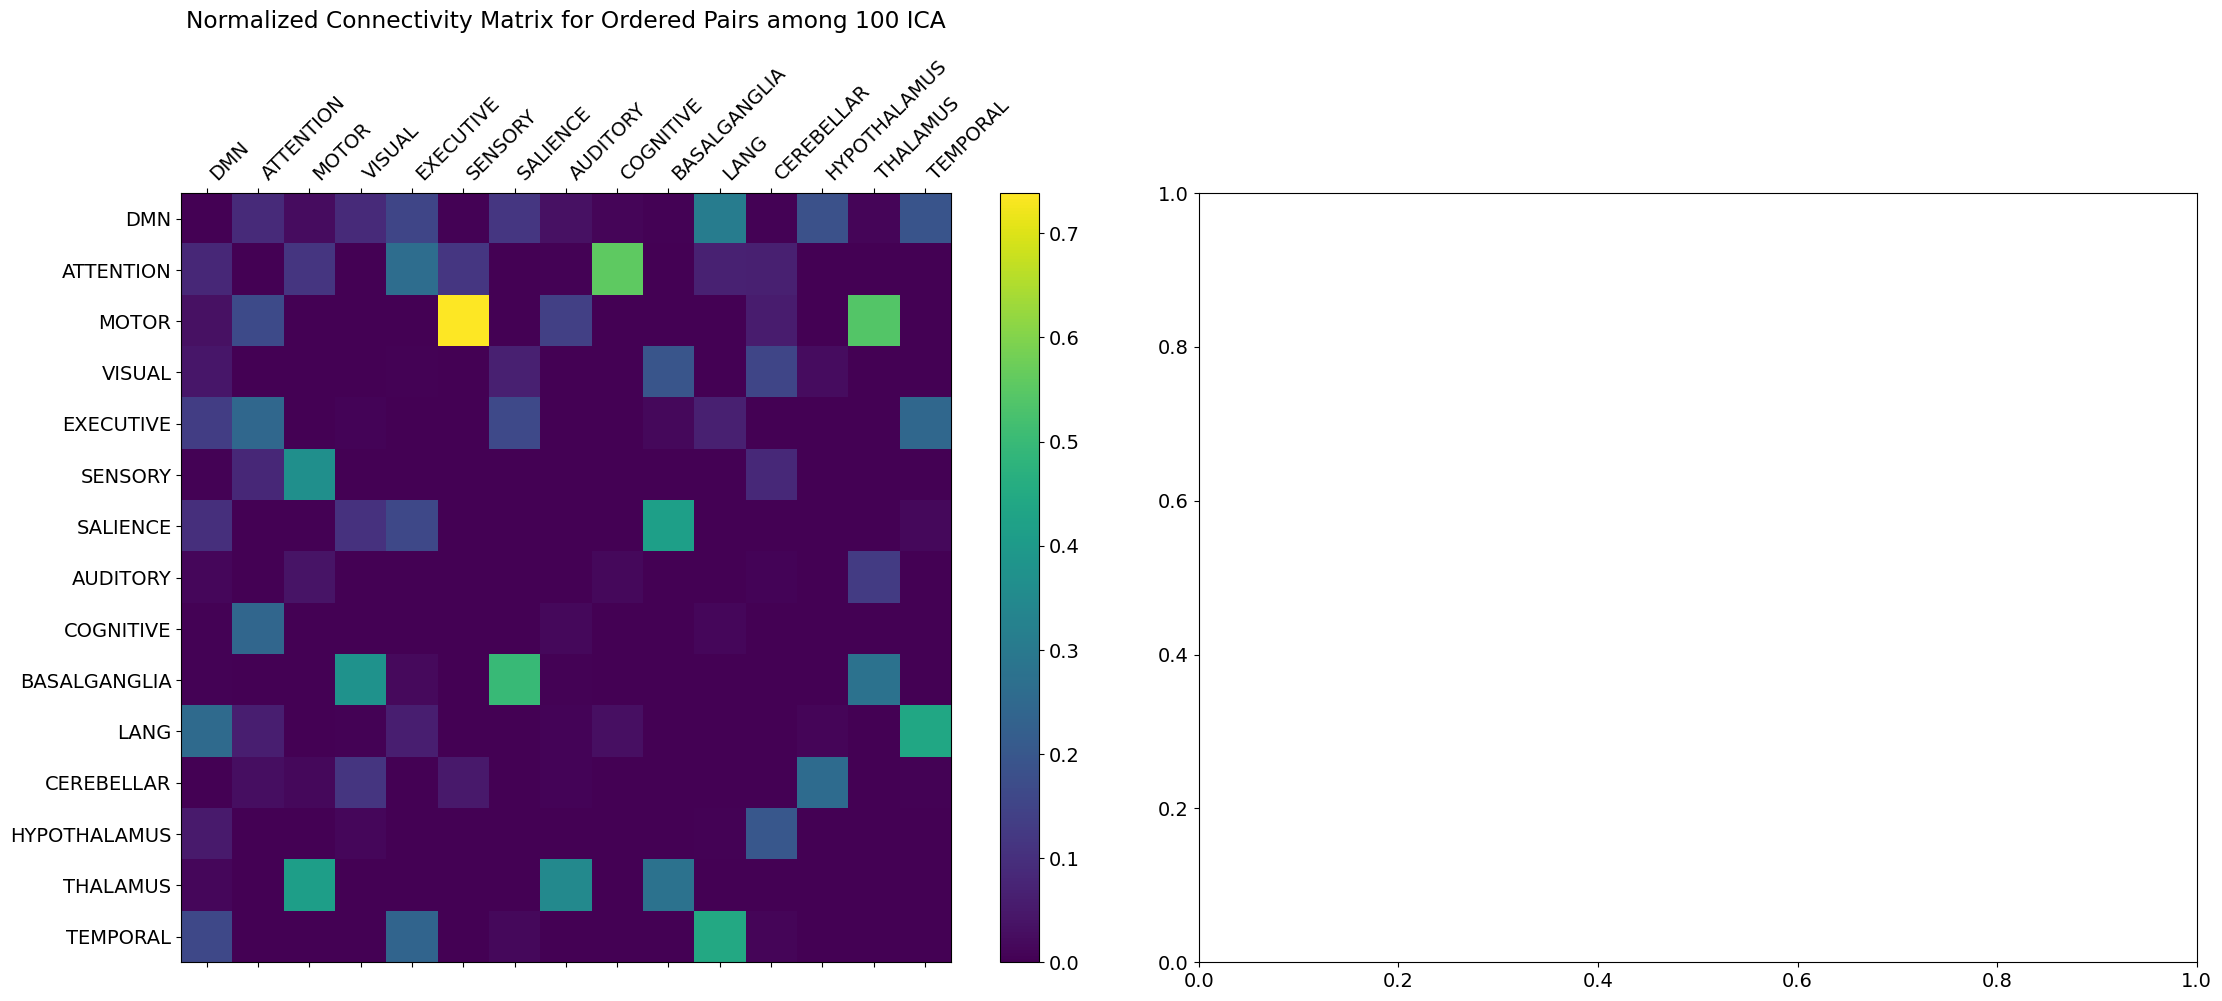

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)

# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})

# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

plt.show()


(52799, 11)
(17599, 11)


<ipython-input-40-776bbcdf9921>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
<ipython-input-40-776bbcdf9921>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)


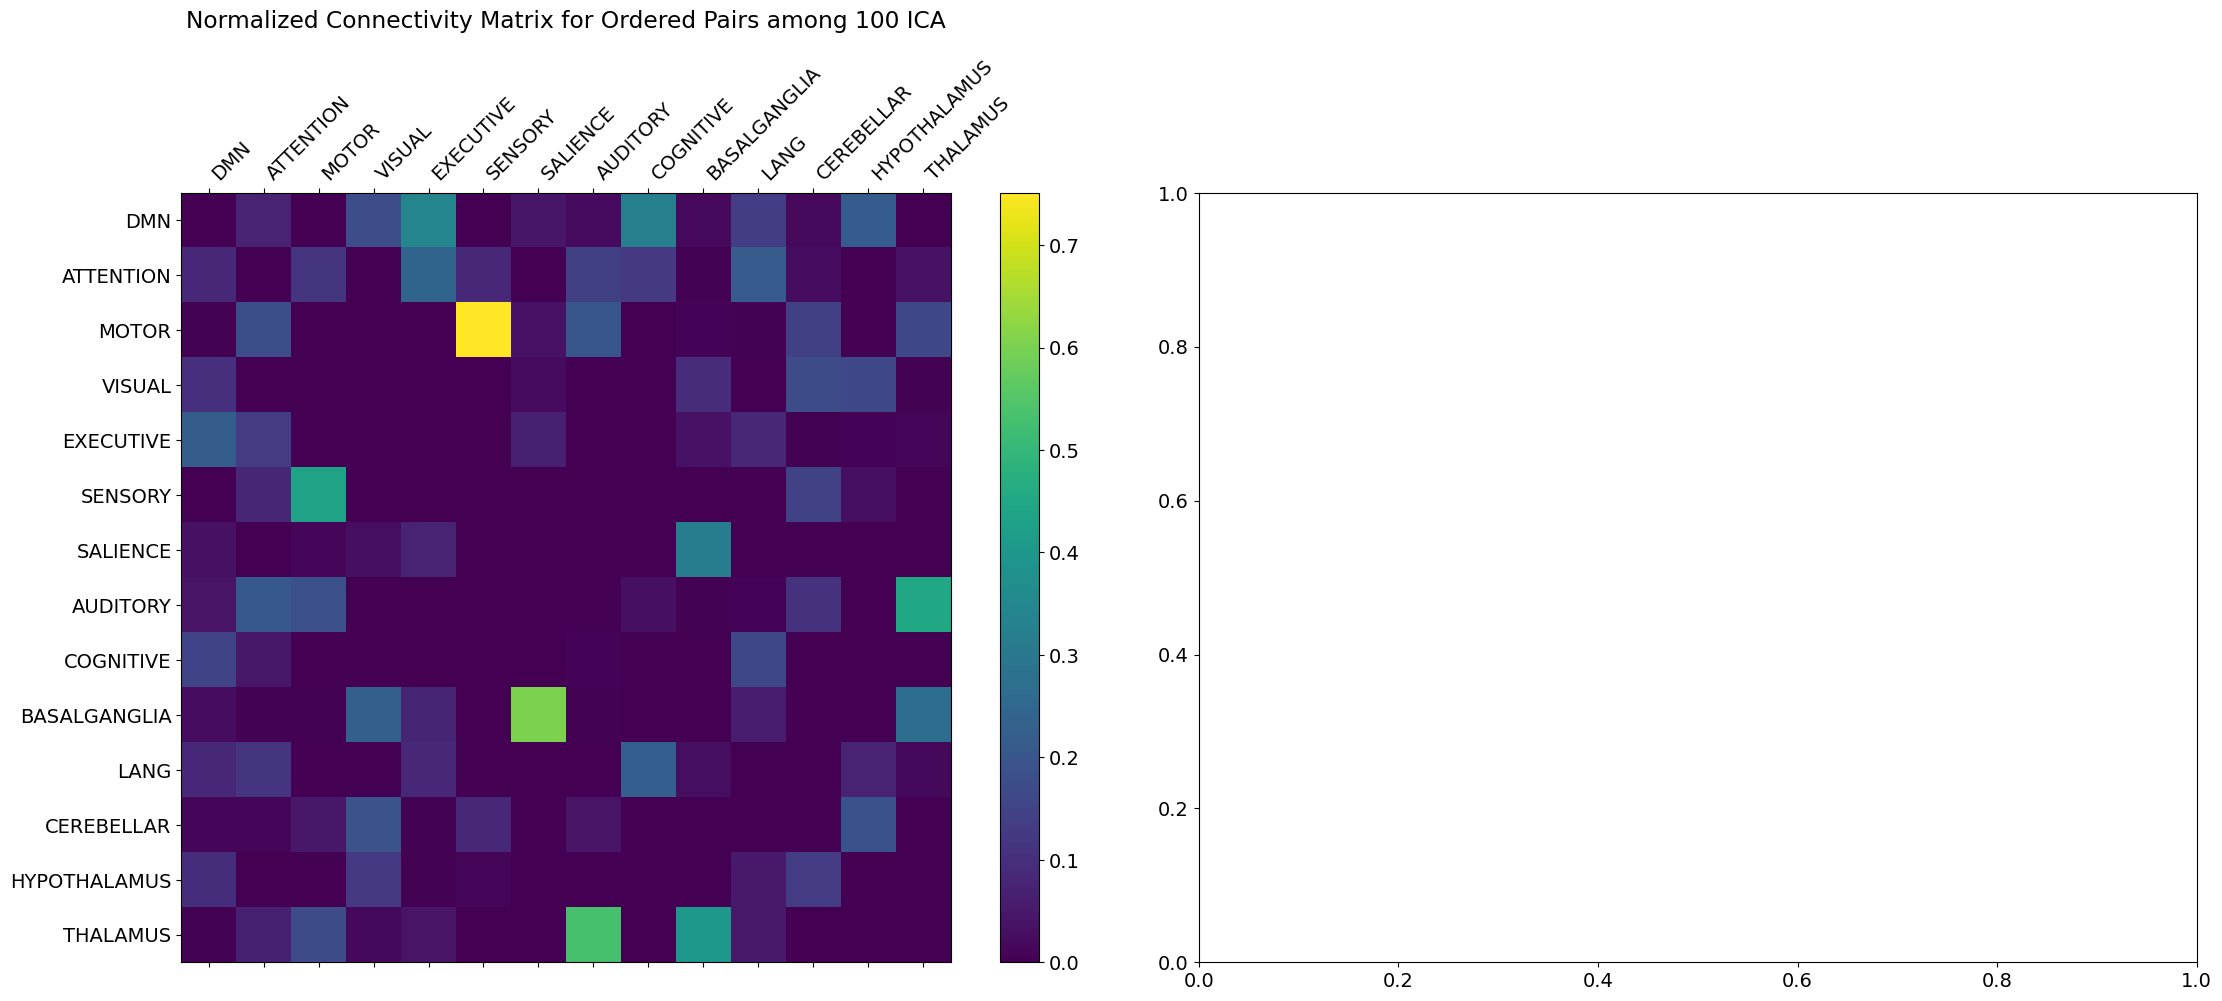

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#FIXED, same as above but testing for sorted table, removing others
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_10_epoch_171_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

# normalized_matrix_ordered_pair_new_5 = np.log1p(normalized_matrix_ordered_pair_new_5)
# normalized_matrix_ordered_pair_new_5 = np.log1p(matrix_ordered_pair_new_5)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)


plt.show()


Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

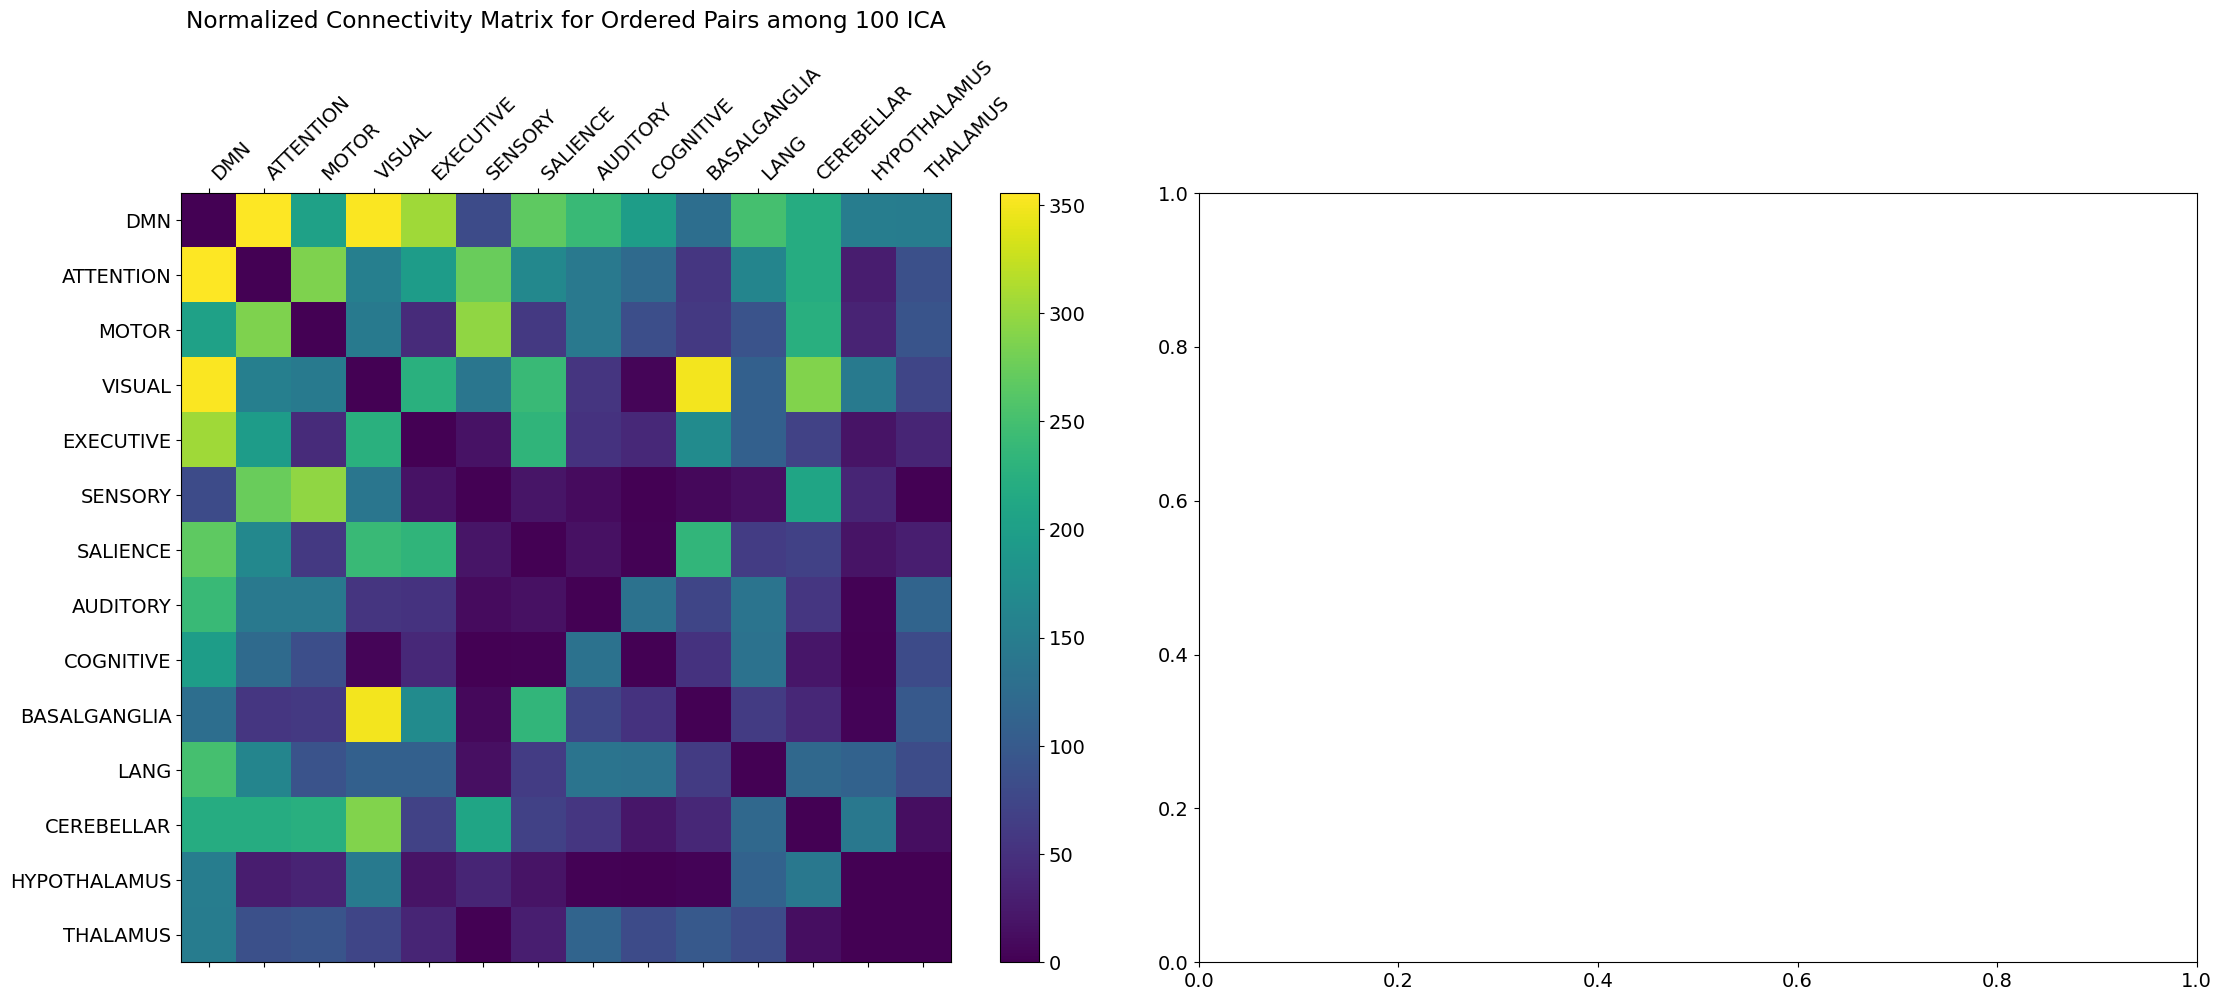

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_new_5 = pd.read_csv("corrected_table_sent_10_epoch_171_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,1,2,3,4,5]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
# normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
# normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)
# Remove the "OTHERS" row and column from the matrix
# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = combined_matrix.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 = np.sqrt(normalized_matrix_ordered_pair_new_5)


fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

(52799, 11)
(17599, 11)


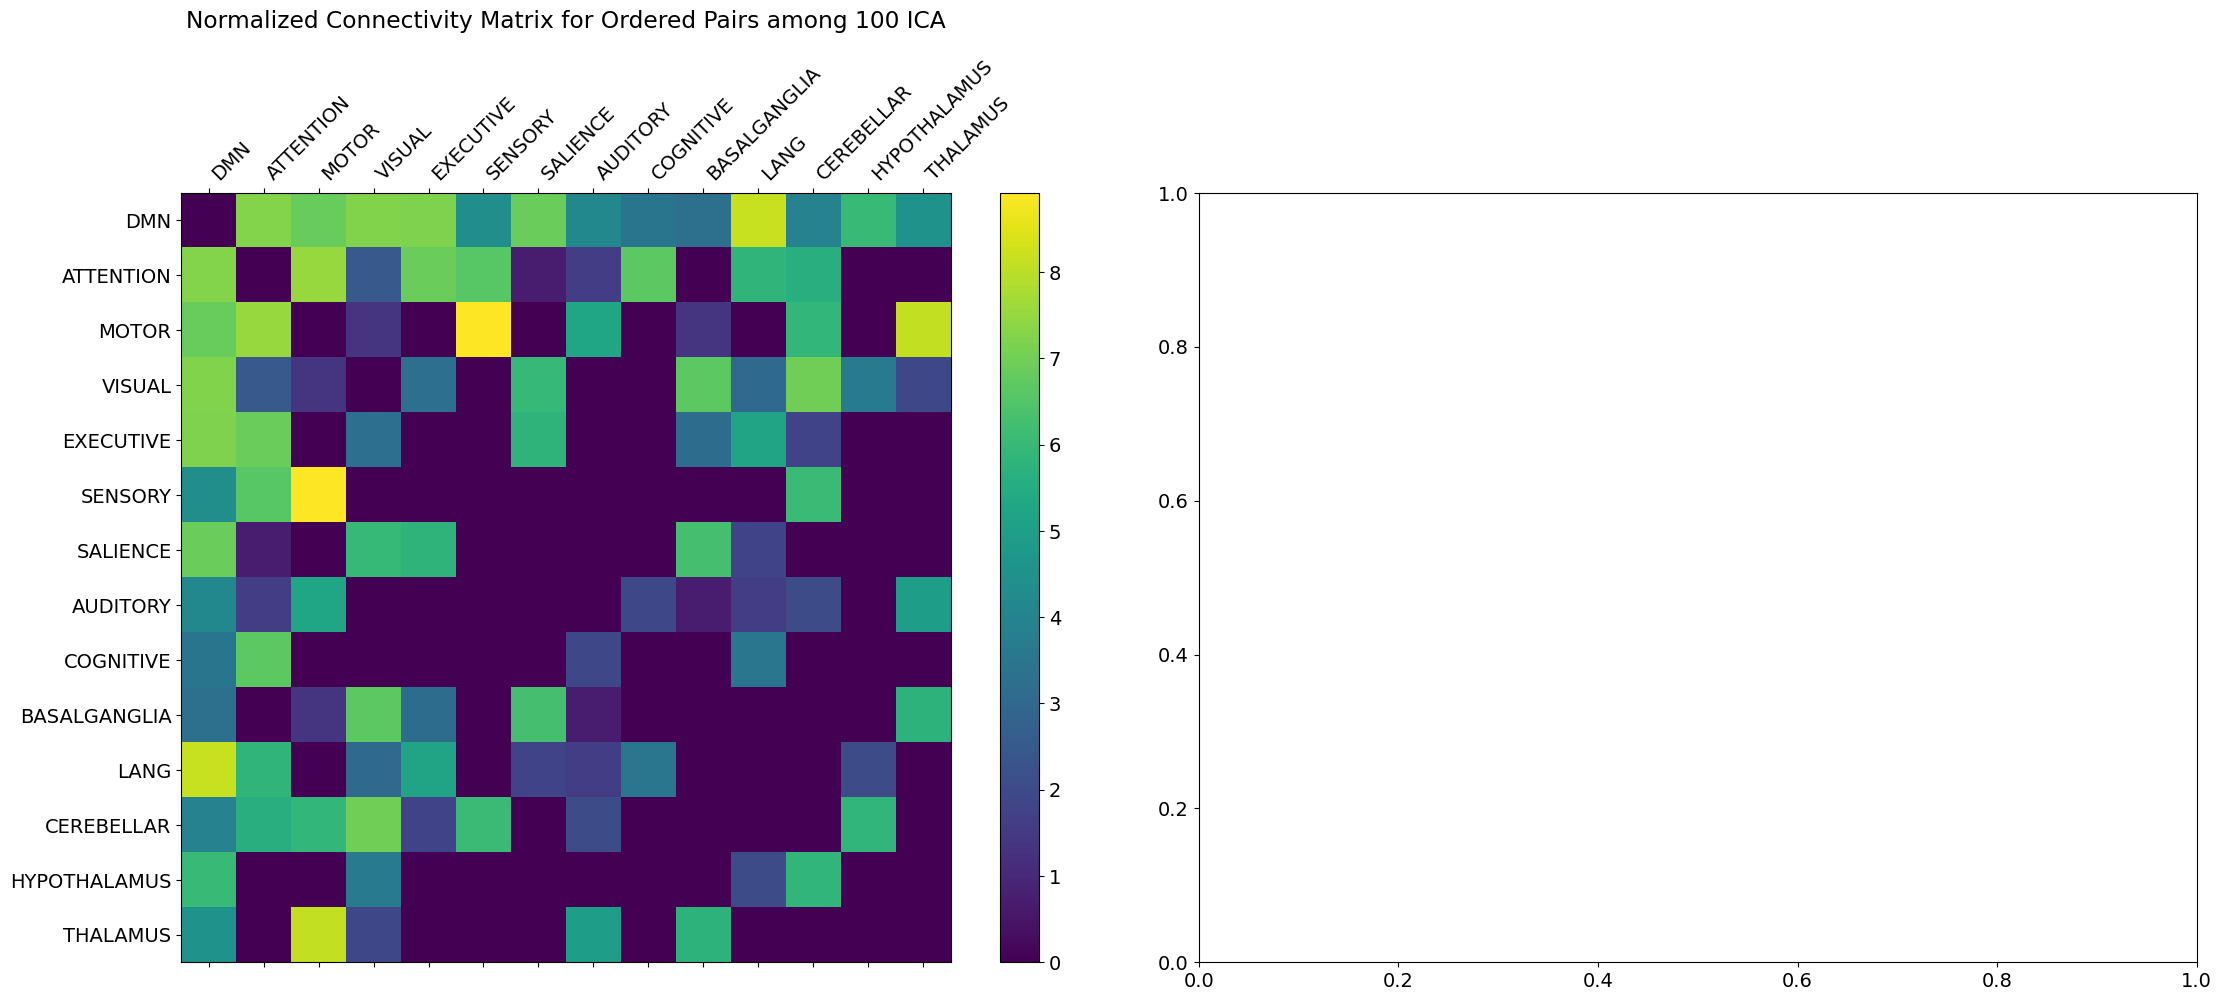

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#FIXED, same as above but testing for sorted table, removing others
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
# normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

normalized_matrix_ordered_pair_new_5 = np.log1p(normalized_matrix_ordered_pair_new_5)
# normalized_matrix_ordered_pair_new_5 = np.log1p(matrix_ordered_pair_new_5)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)


plt.show()


Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

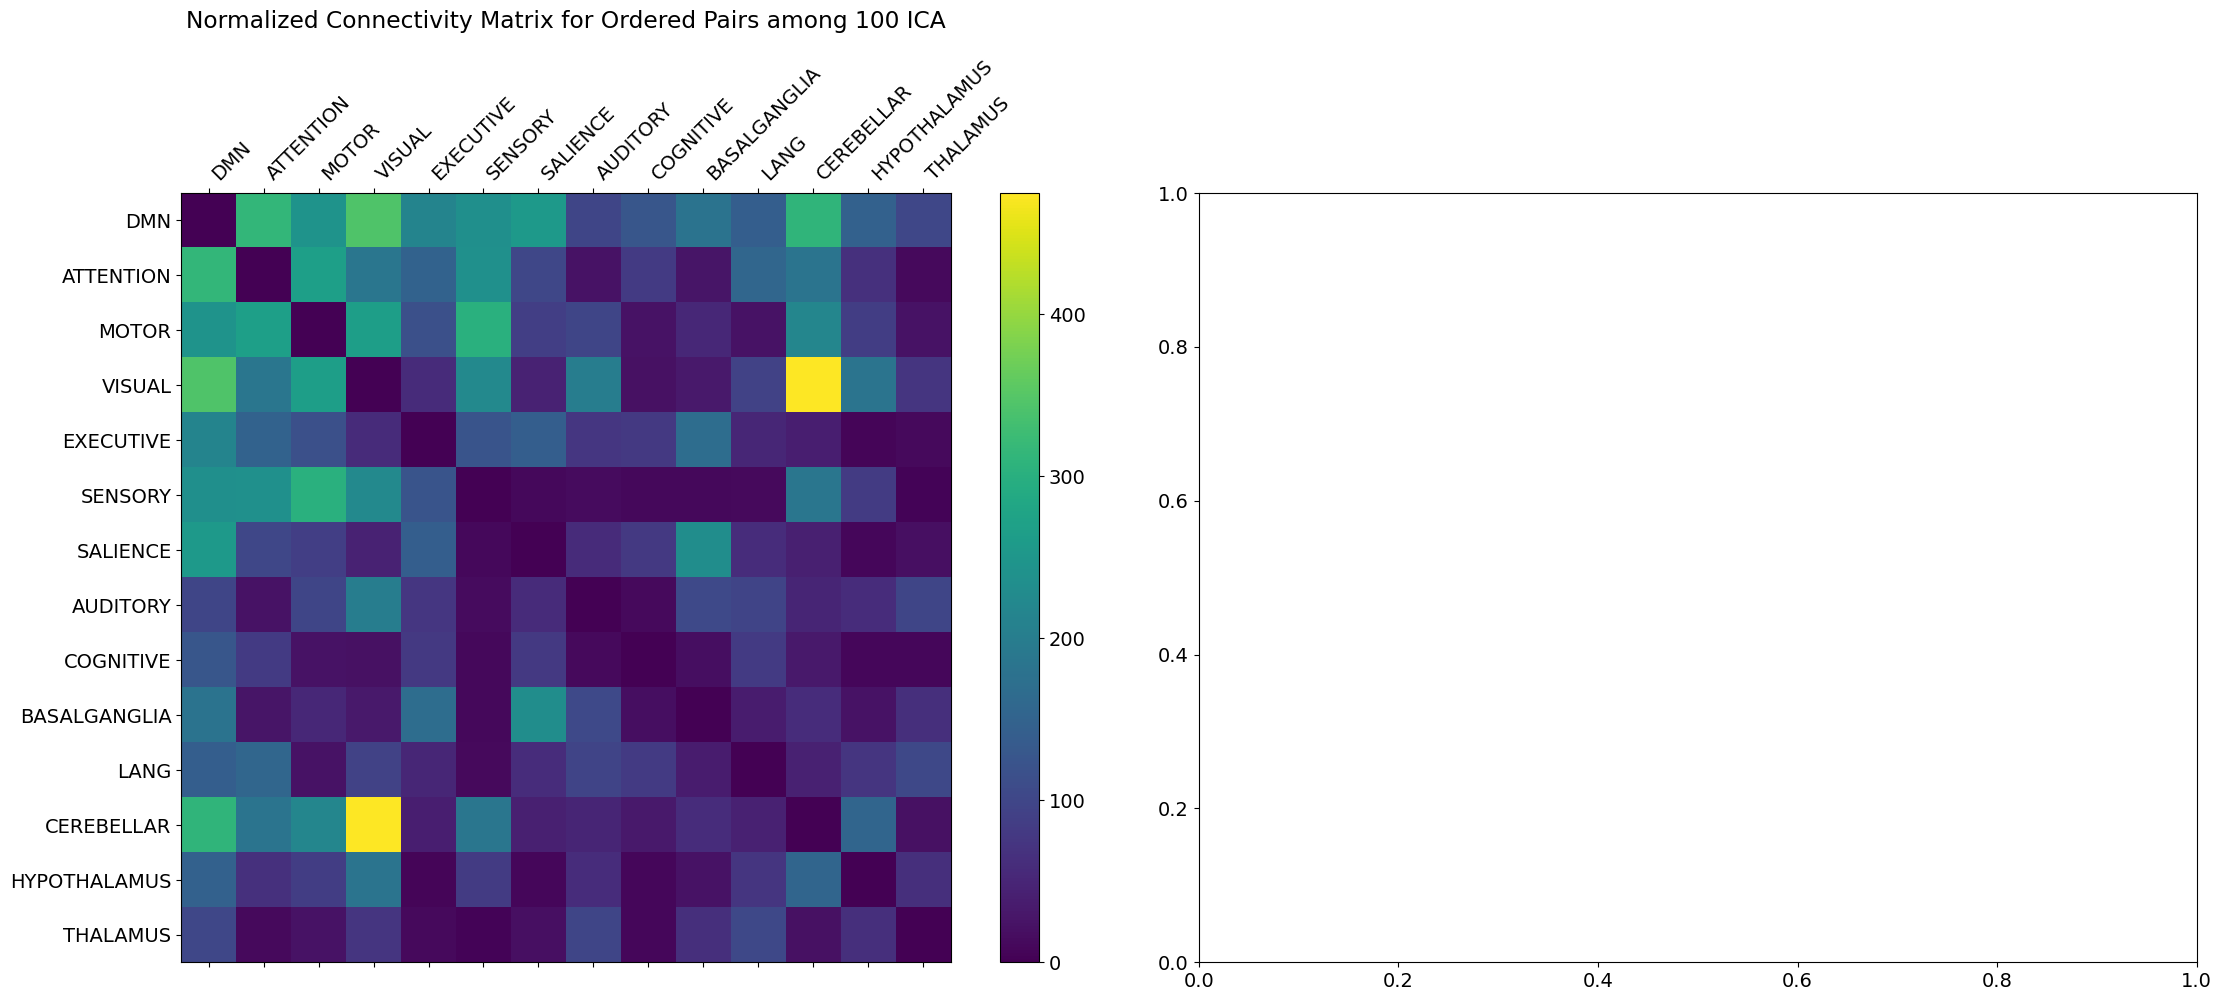

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,1,2,3,4,5]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
# normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
# normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)
# Remove the "OTHERS" row and column from the matrix
# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = combined_matrix.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 = np.sqrt(normalized_matrix_ordered_pair_new_5)


fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

(52799, 6)
(17600, 6)


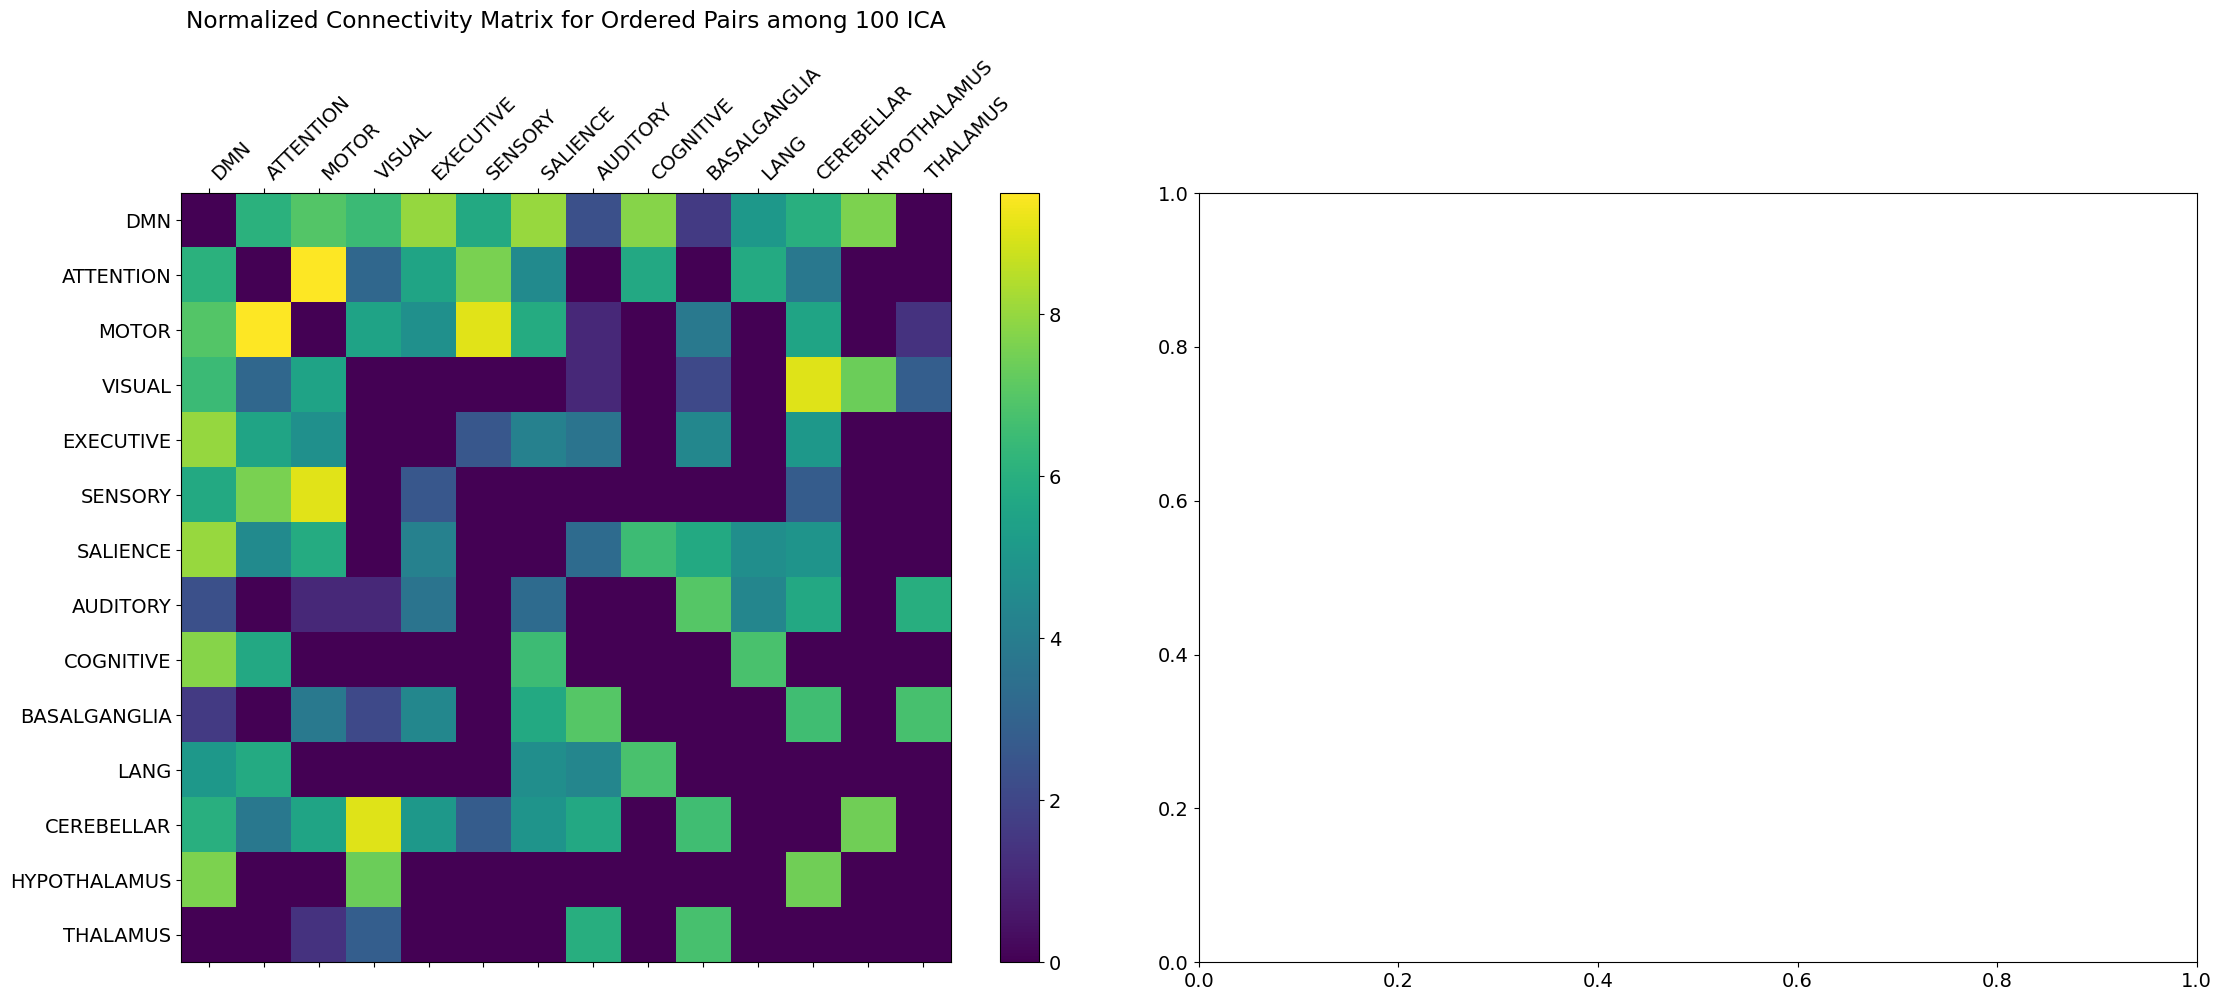

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#FIXED, same as above but testing for sorted table, removing others
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
# normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

normalized_matrix_ordered_pair_new_5 = np.log1p(normalized_matrix_ordered_pair_new_5)
# normalized_matrix_ordered_pair_new_5 = np.log1p(matrix_ordered_pair_new_5)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)


plt.show()


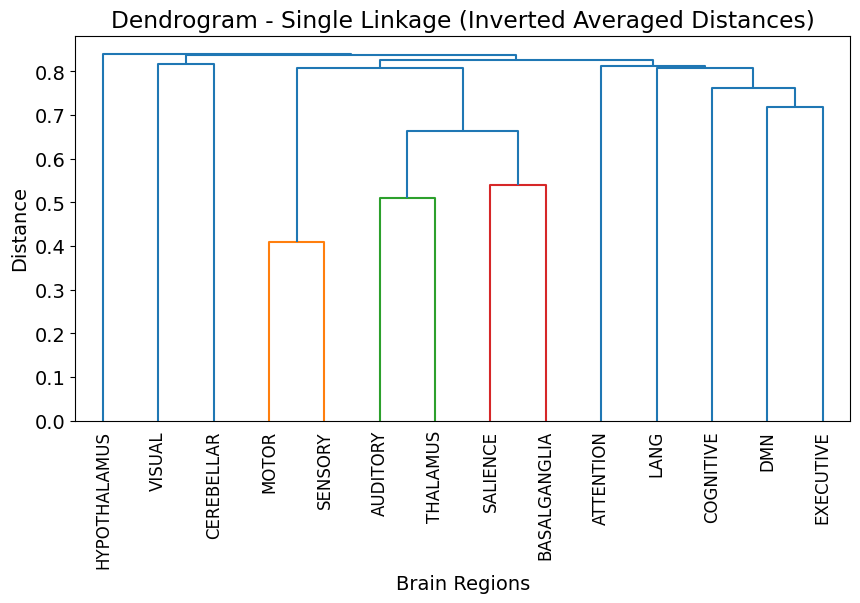

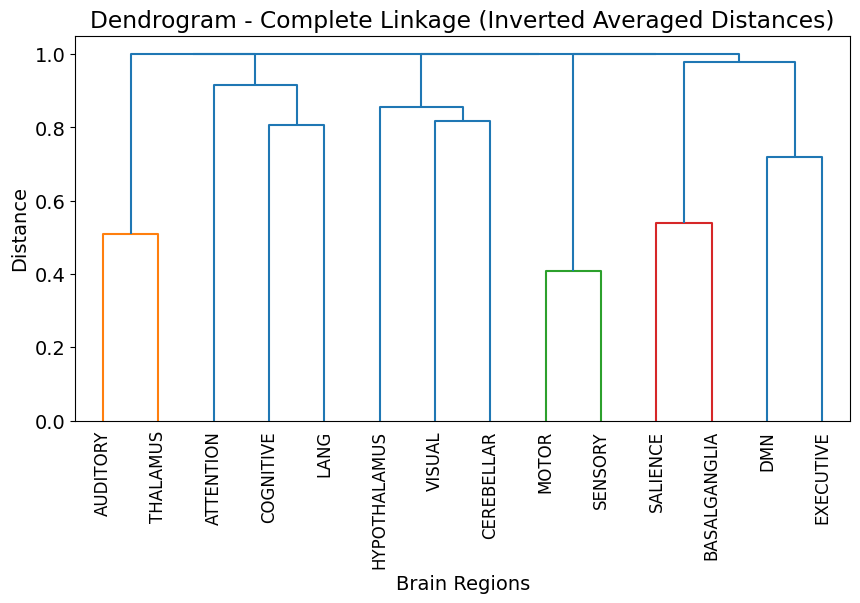

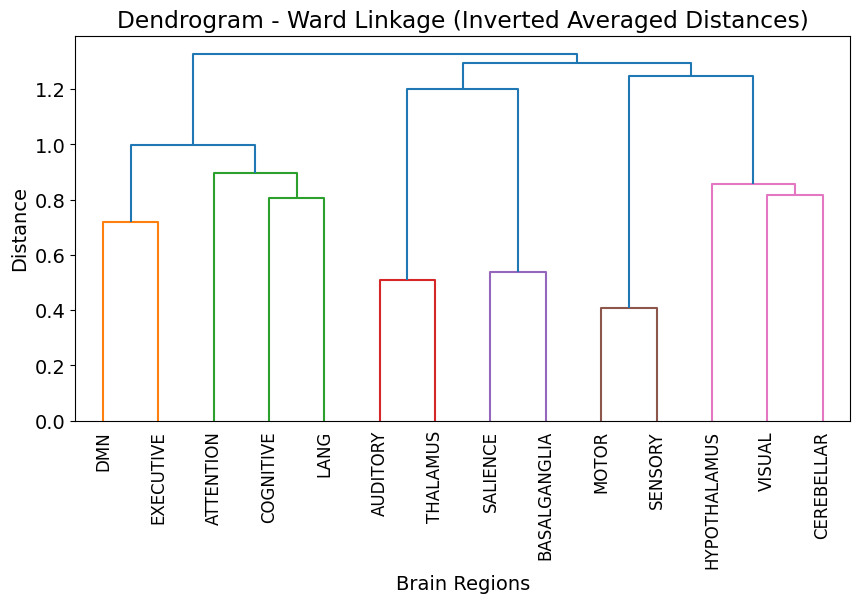

In [ ]:
# Function to plot dendrogram with brain region labels
#ROW , SENT 10, 171 epoch, FIXING THE SYMMETRY THING FOR ROW
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


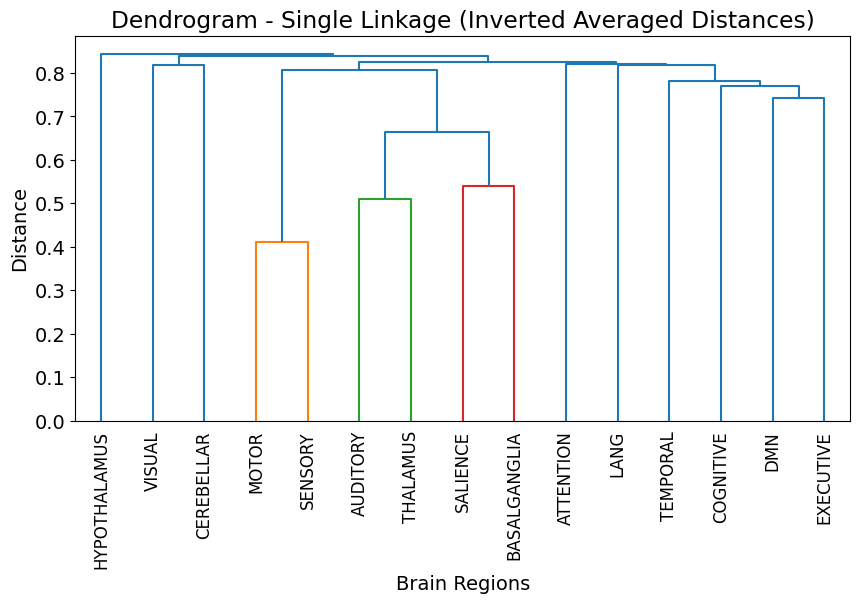

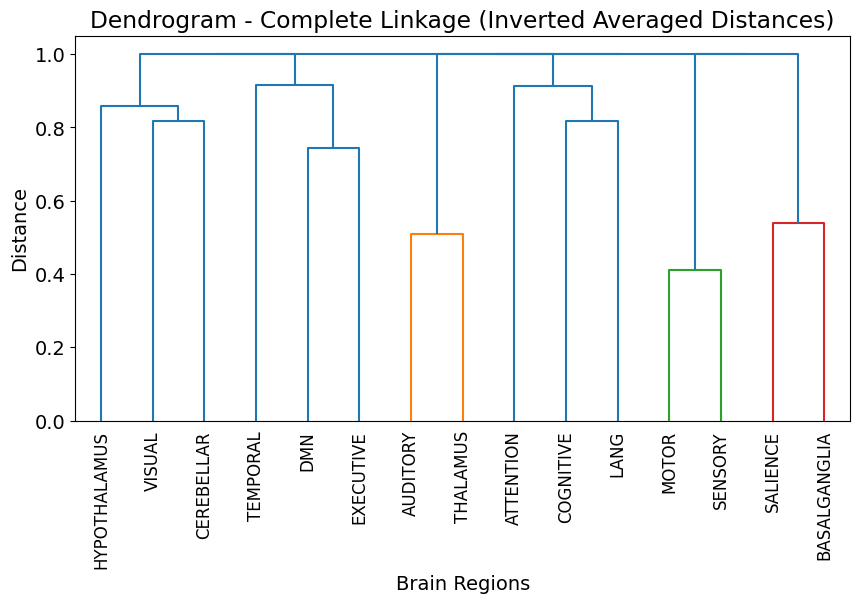

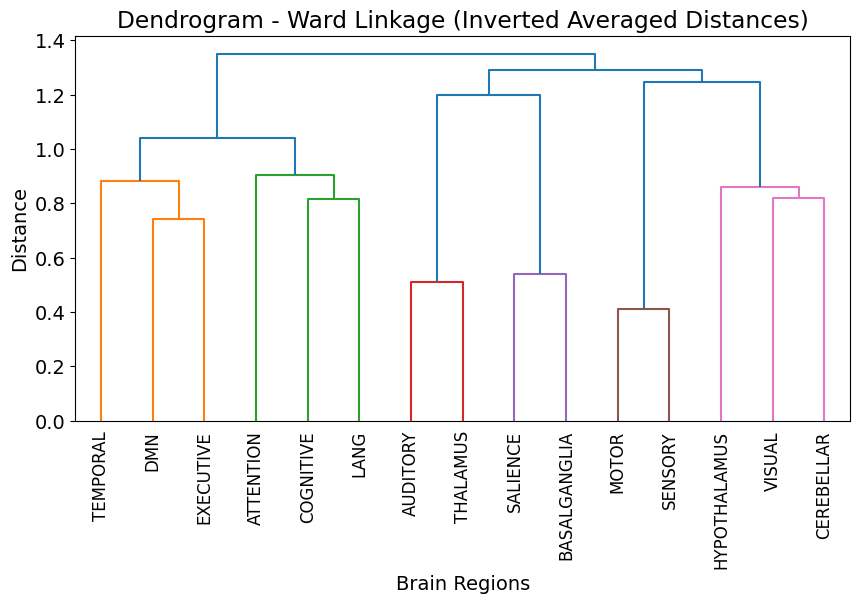

In [ ]:
# Function to plot dendrogram with brain region labels
#ROW , SENT 10, 171 epoch, FIXING THE SYMMETRY THING FOR ROW
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = normalized_matrix_ordered_pair_new_5.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


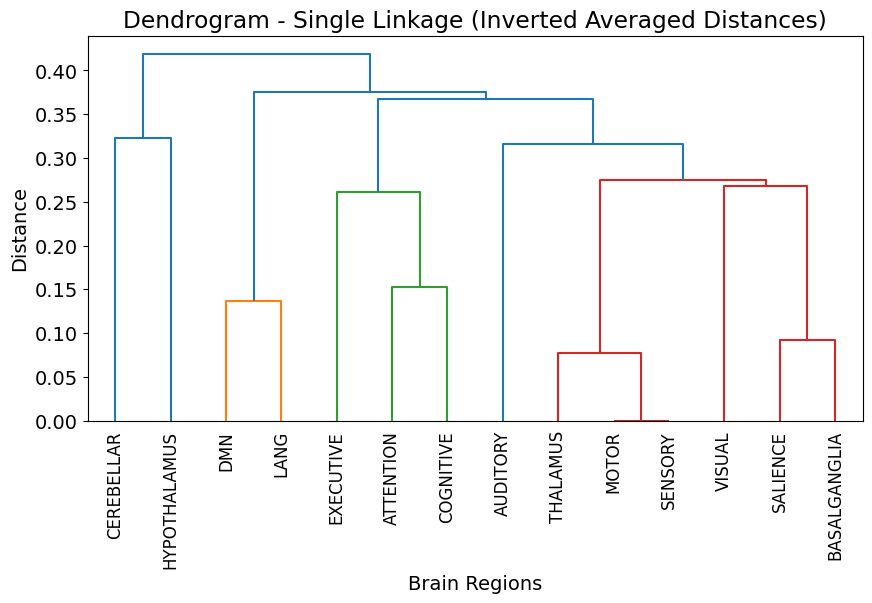

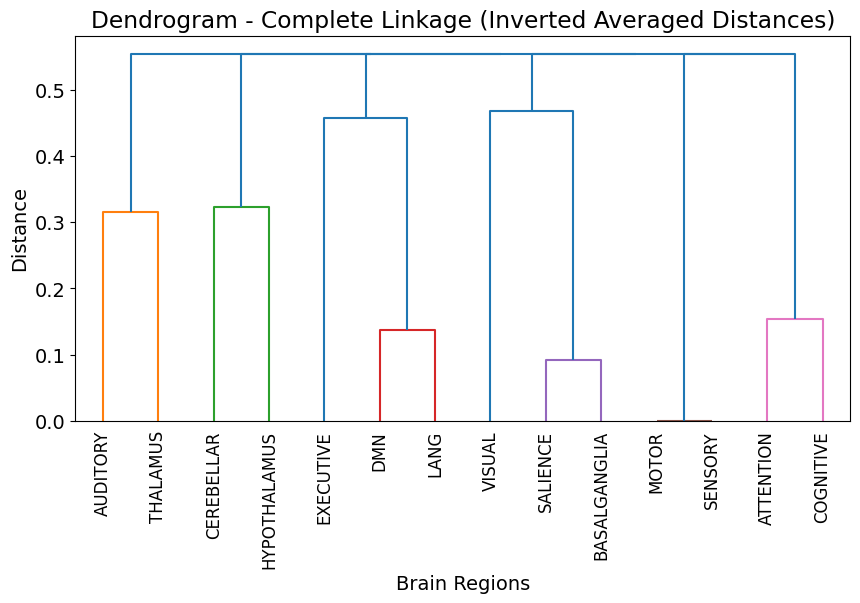

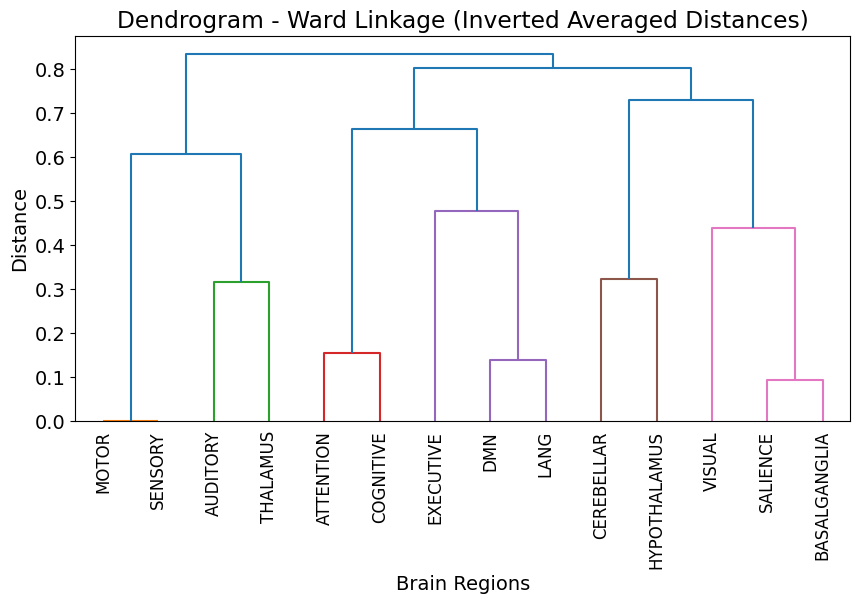

In [ ]:
# Function to plot dendrogram with brain region labels
#ROW AND COLUM, SENT 10
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.values.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


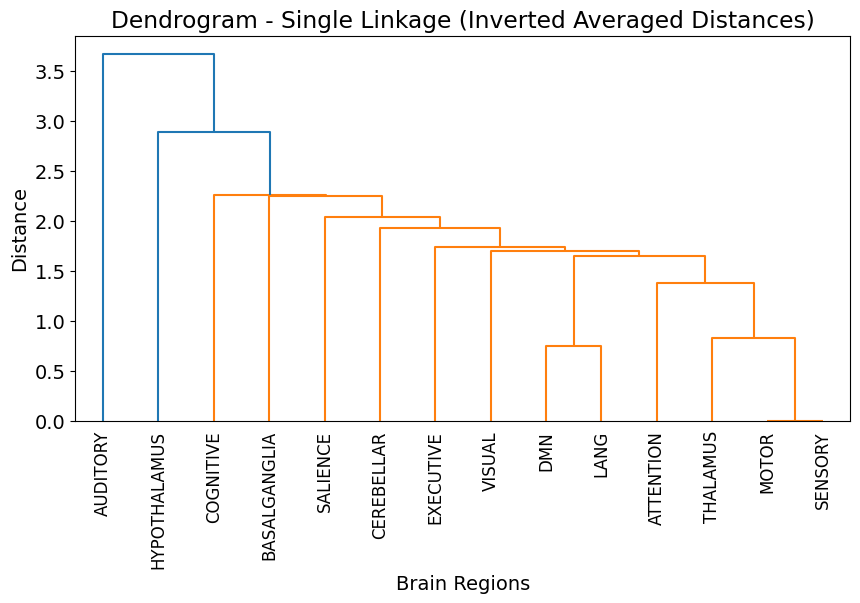

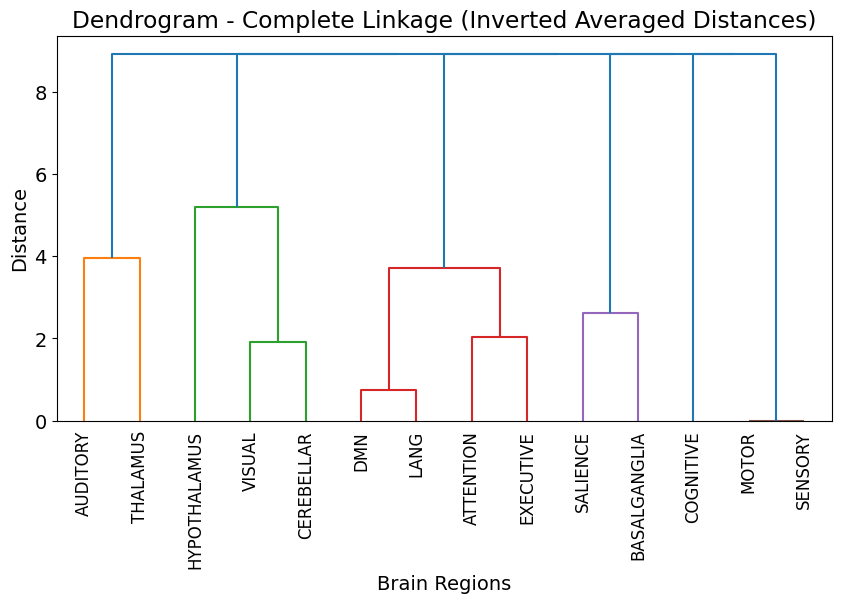

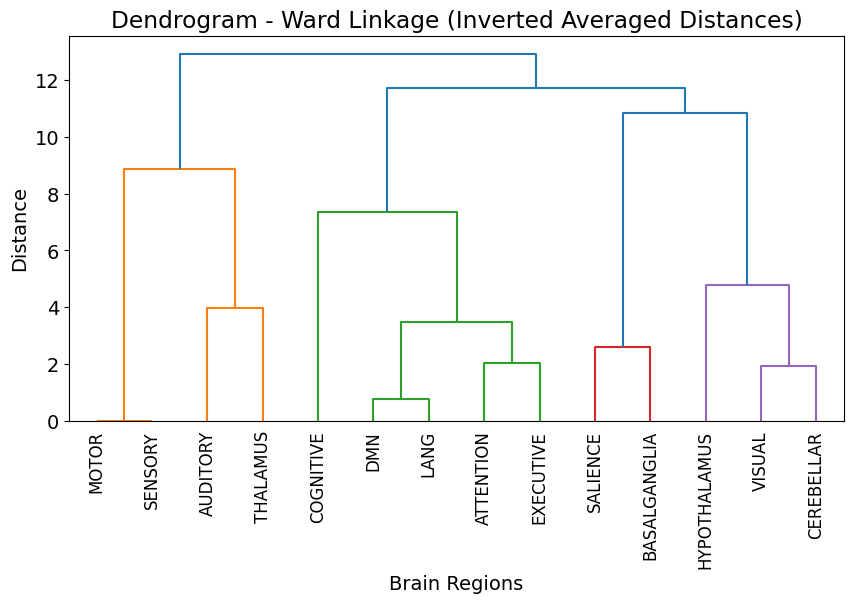

In [ ]:
# Function to plot dendrogram with brain region labels
#LOG, Sent 10
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.values.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


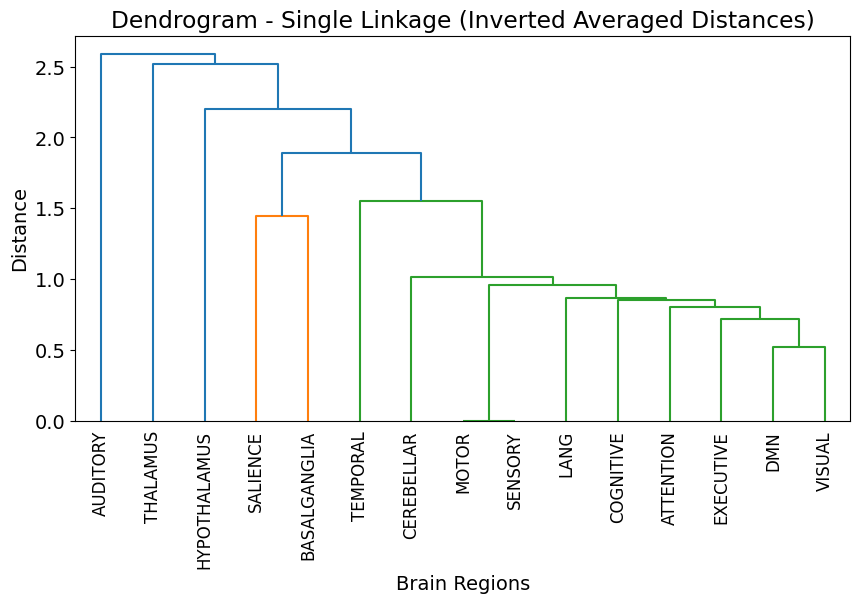

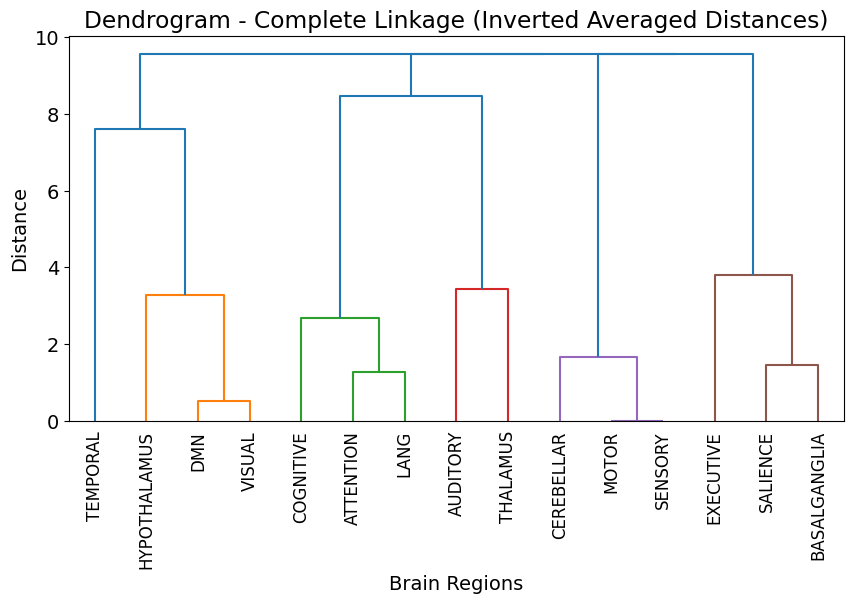

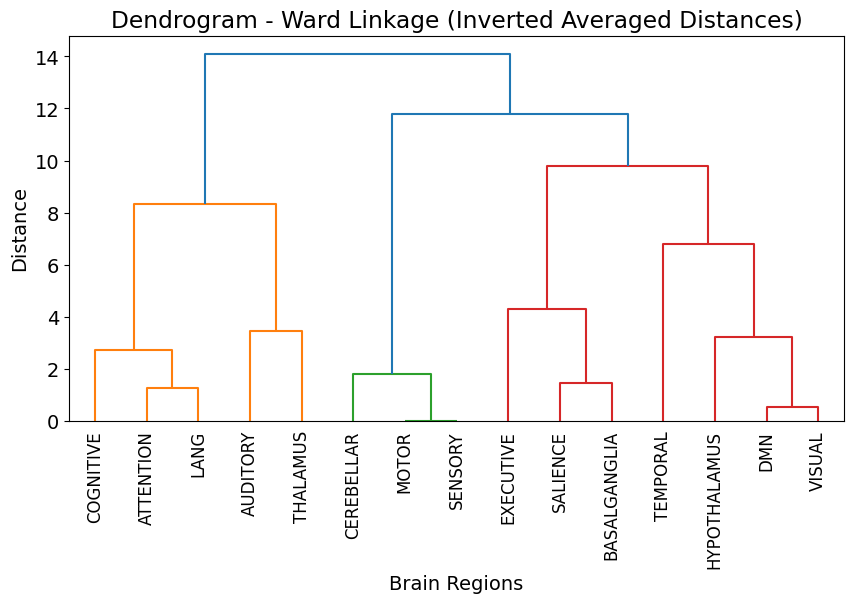

In [ ]:
# Function to plot dendrogram with brain region labels
#Combined SQRT NORMALIZATION
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.values.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


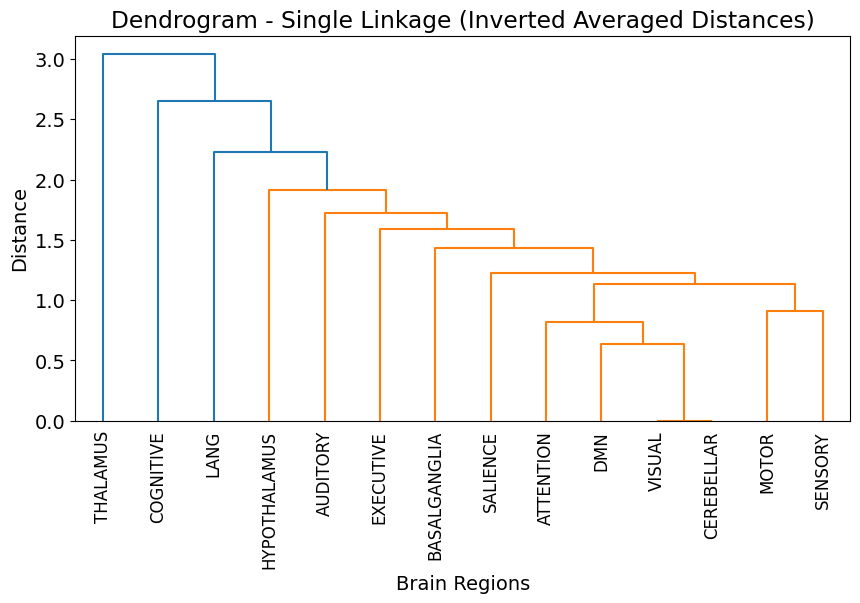

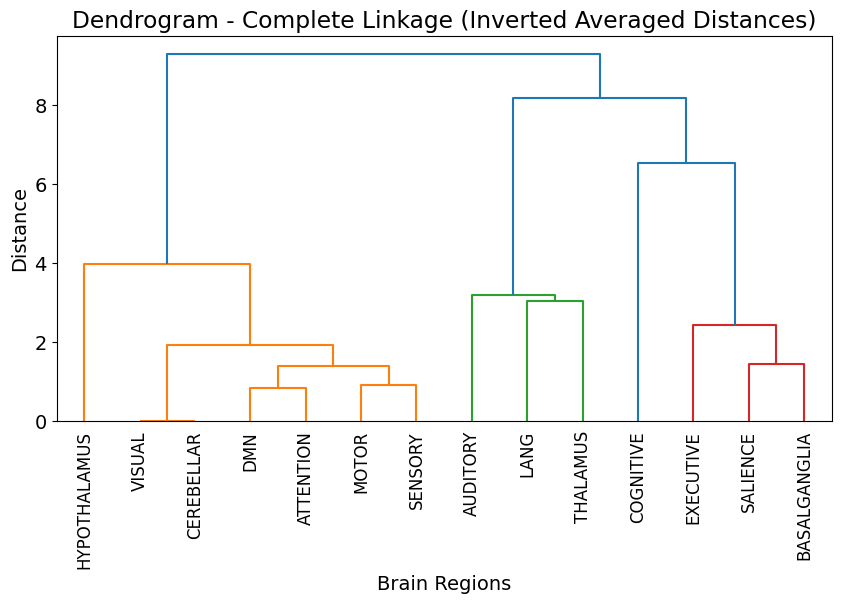

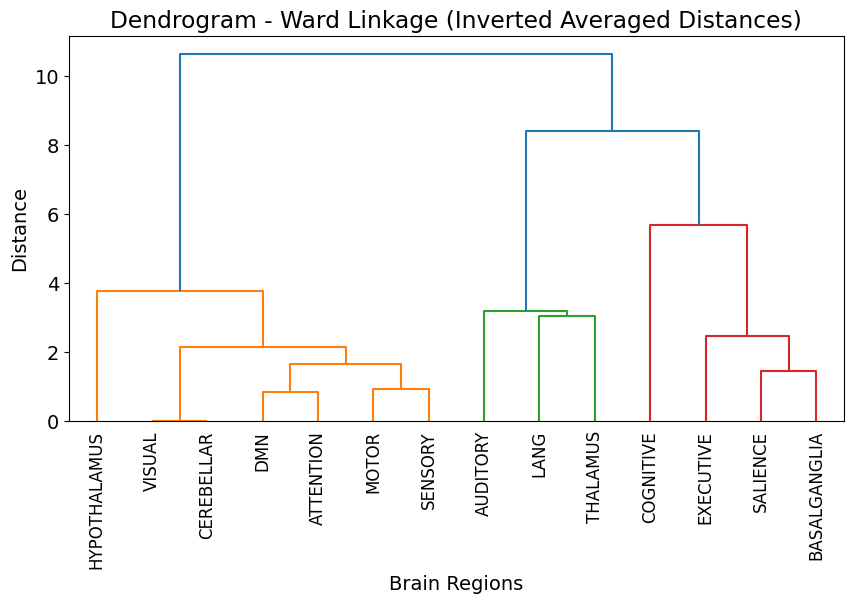

In [ ]:
# Function to plot dendrogram with brain region labels
#Combined LOG NORMALIZATION
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.values.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


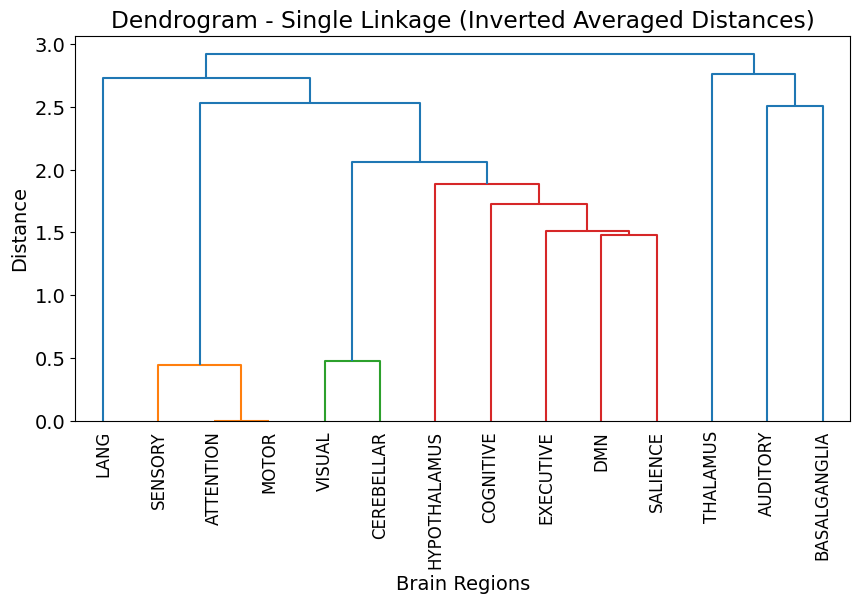

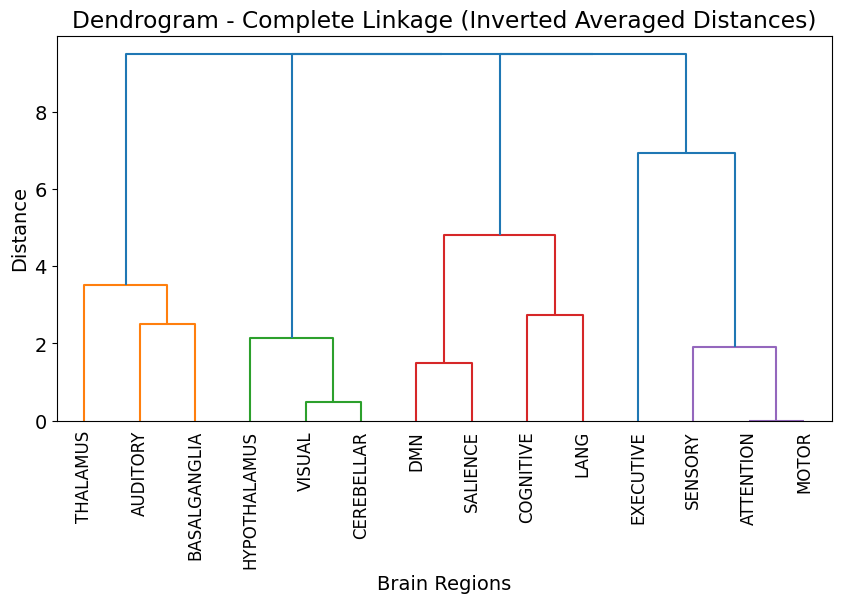

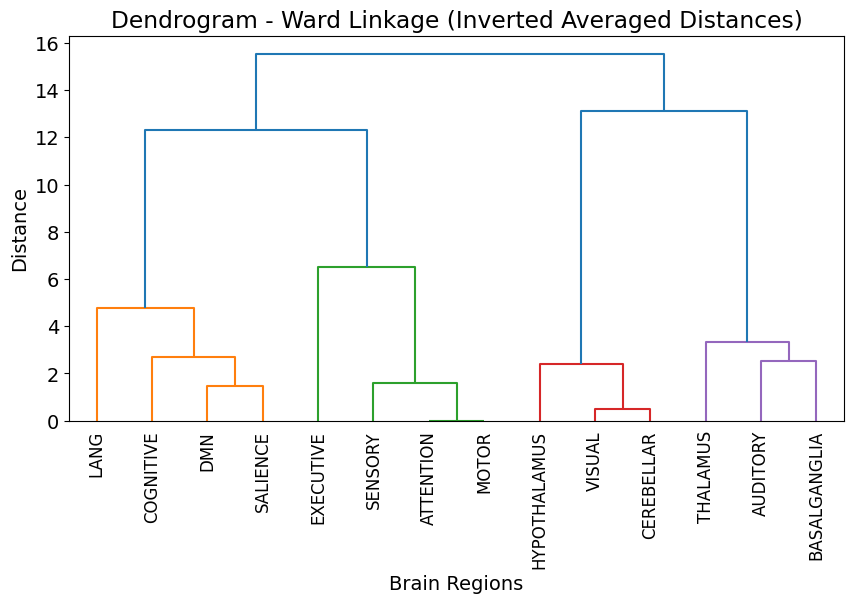

In [ ]:
# Function to plot dendrogram with brain region labels
#LOG NORMALIZATION
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.values.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


In [ ]:
# Function to plot dendrogram with brain region labels
#ROW and COLUMN NORMALIZATION
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


ValueError: Linkage 'Z' contains negative distances.

<Figure size 1000x500 with 0 Axes>

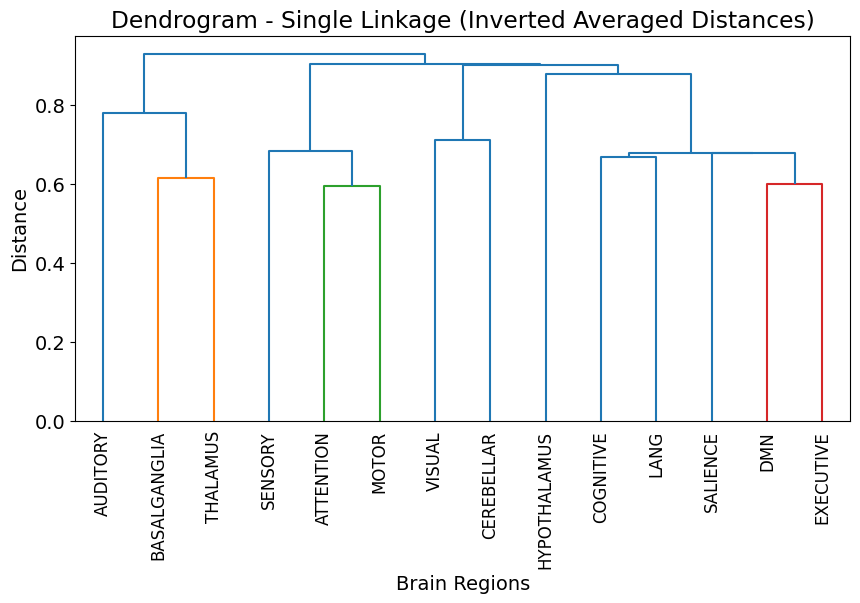

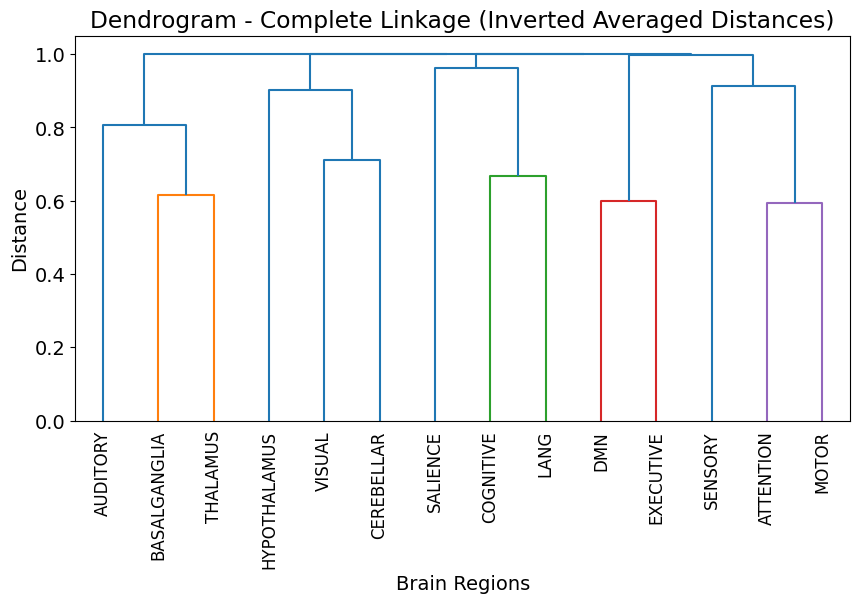

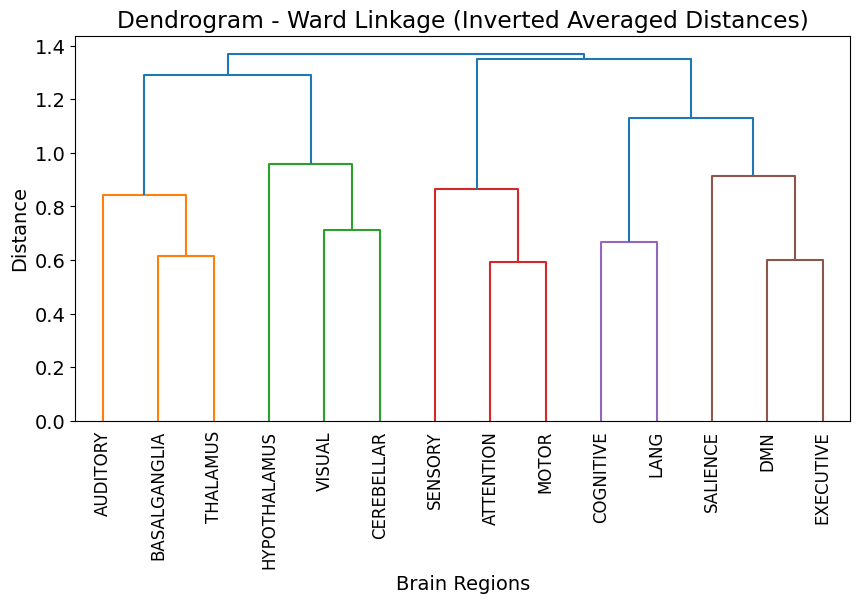

In [ ]:
# Function to plot dendrogram with brain region labels
#ROW NORMALIZATION
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


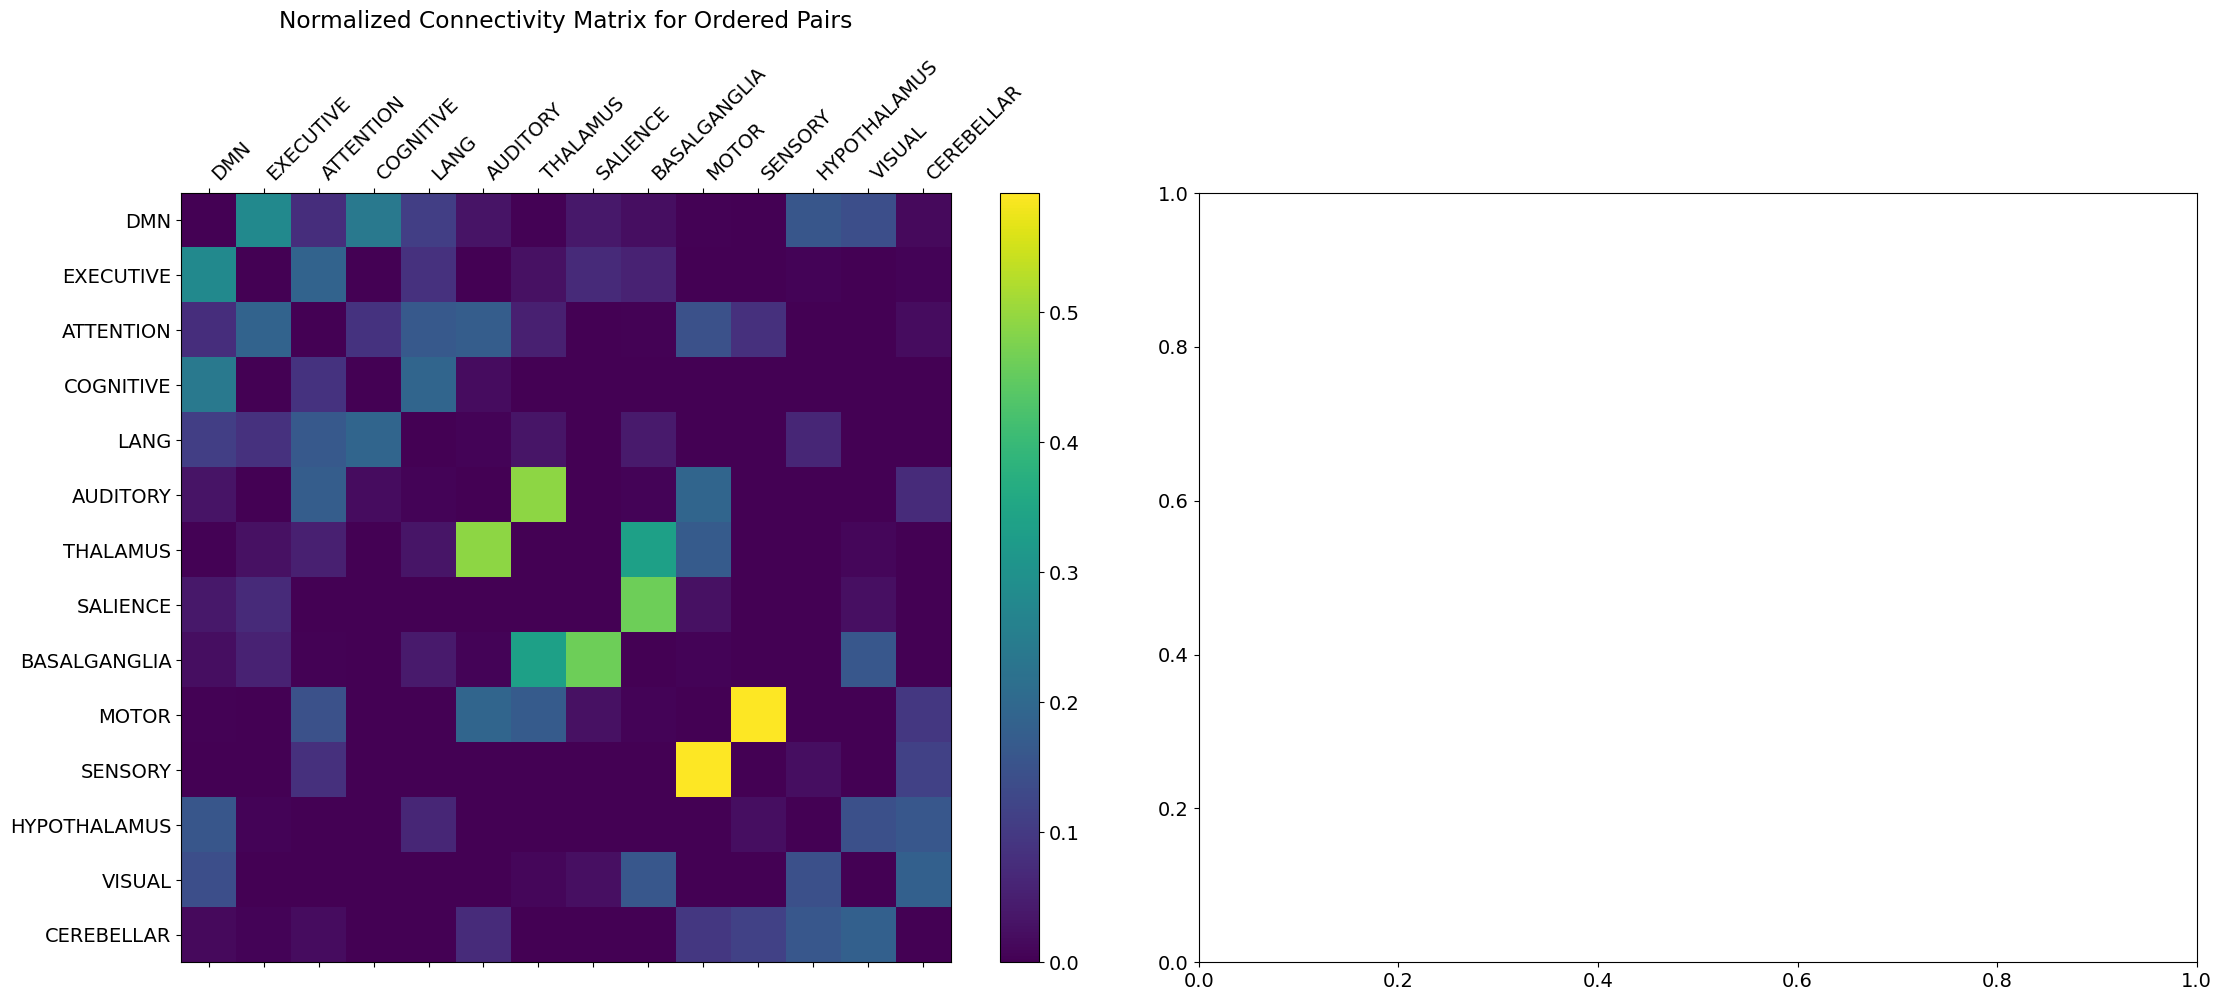

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#row and column, SENT 10, epoch 171, symmetrized, without temporal
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



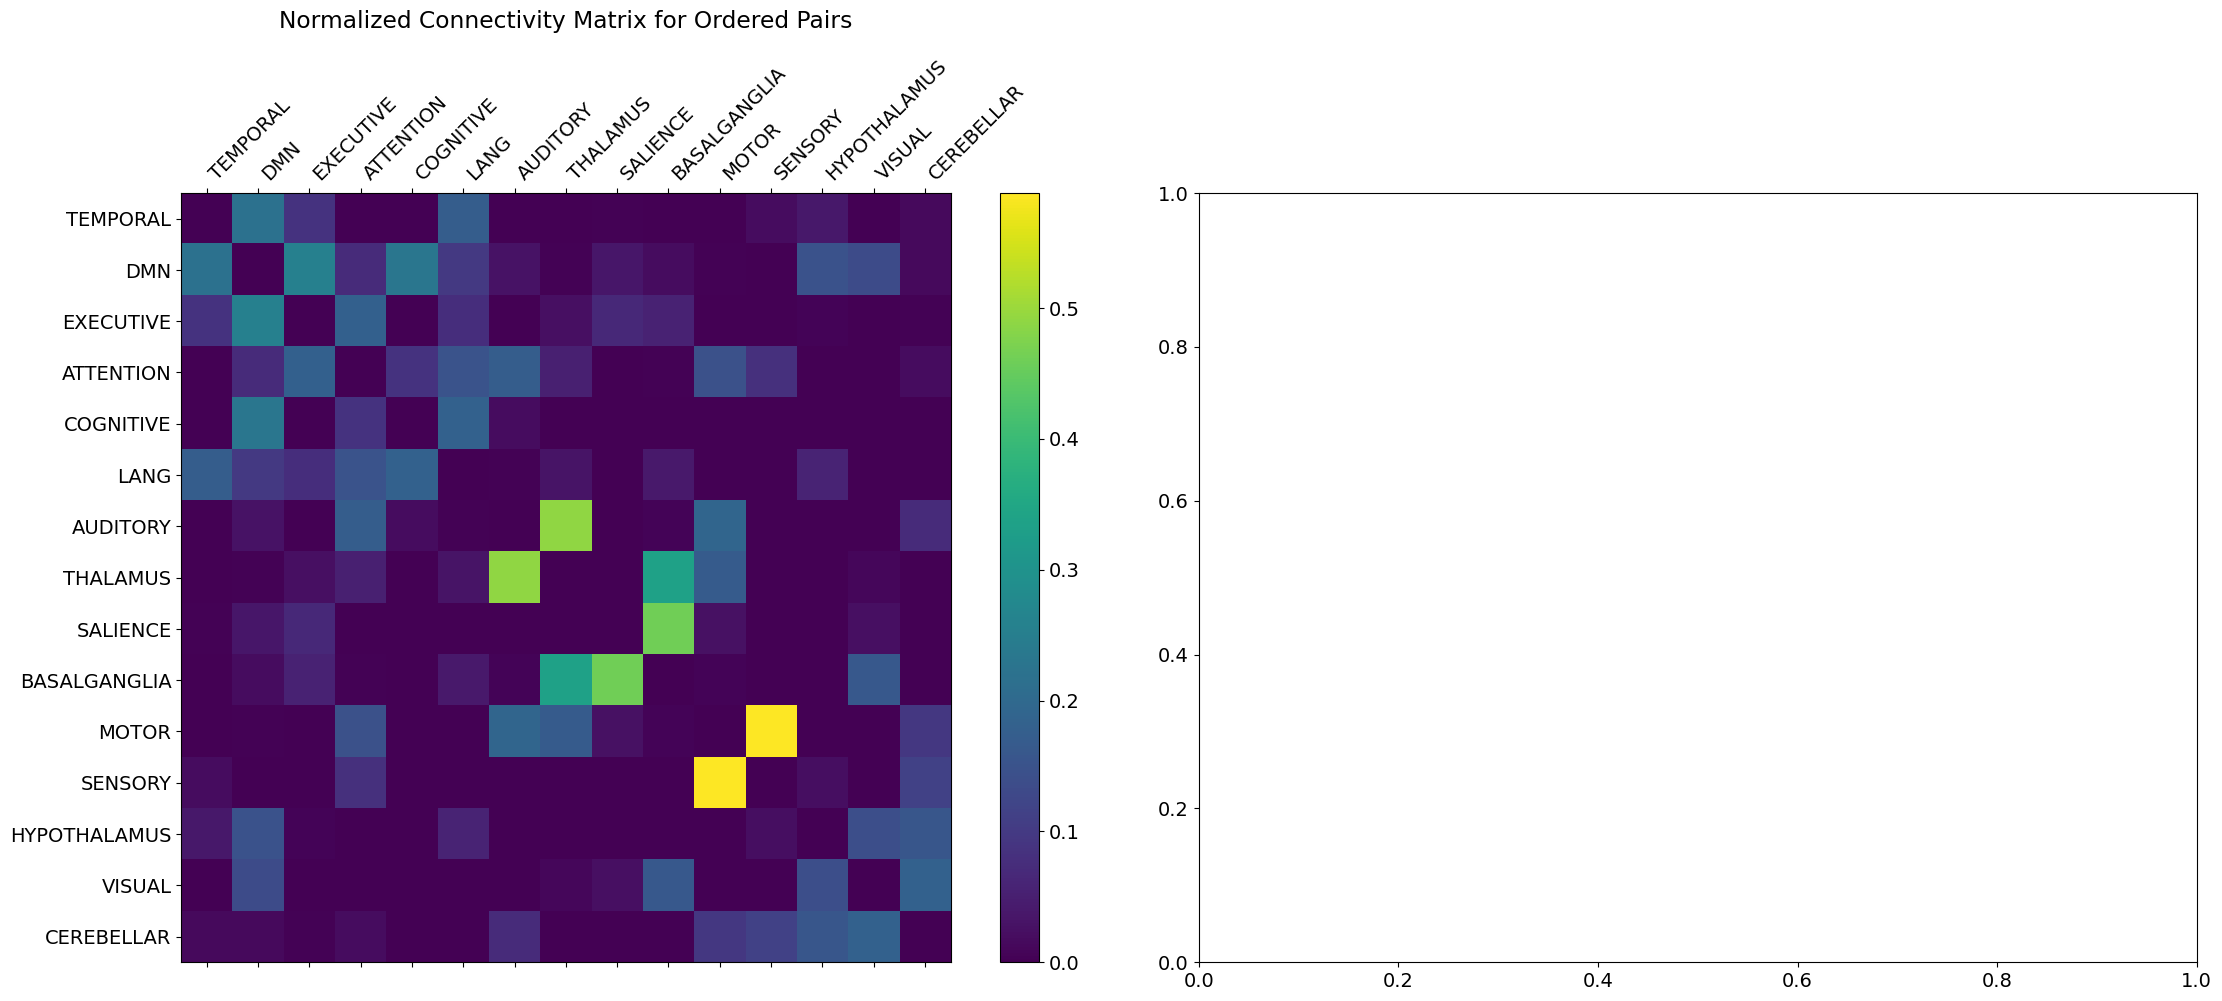

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#row and column, SENT 10, epoch 171, symmetrized
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



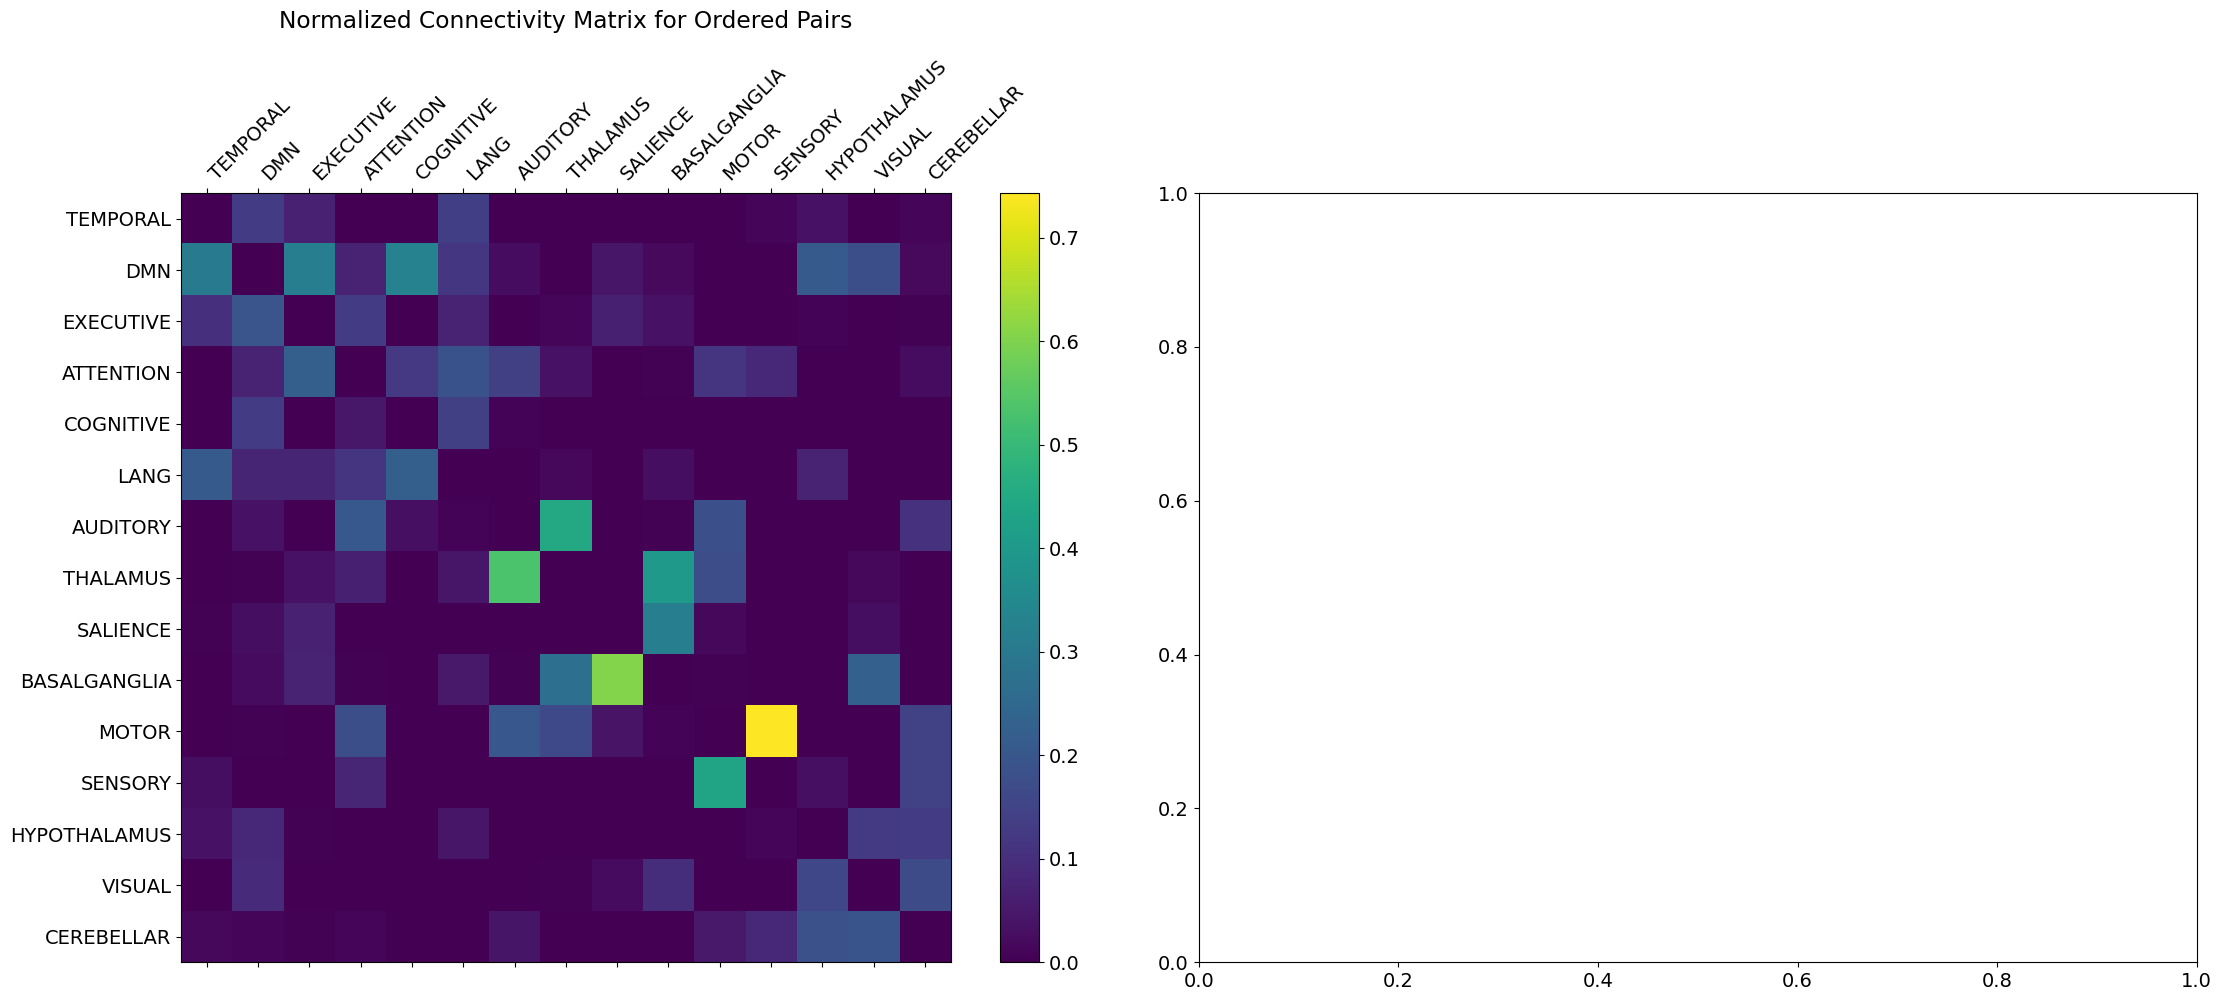

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#row and column, SENT 10, epoch 171
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



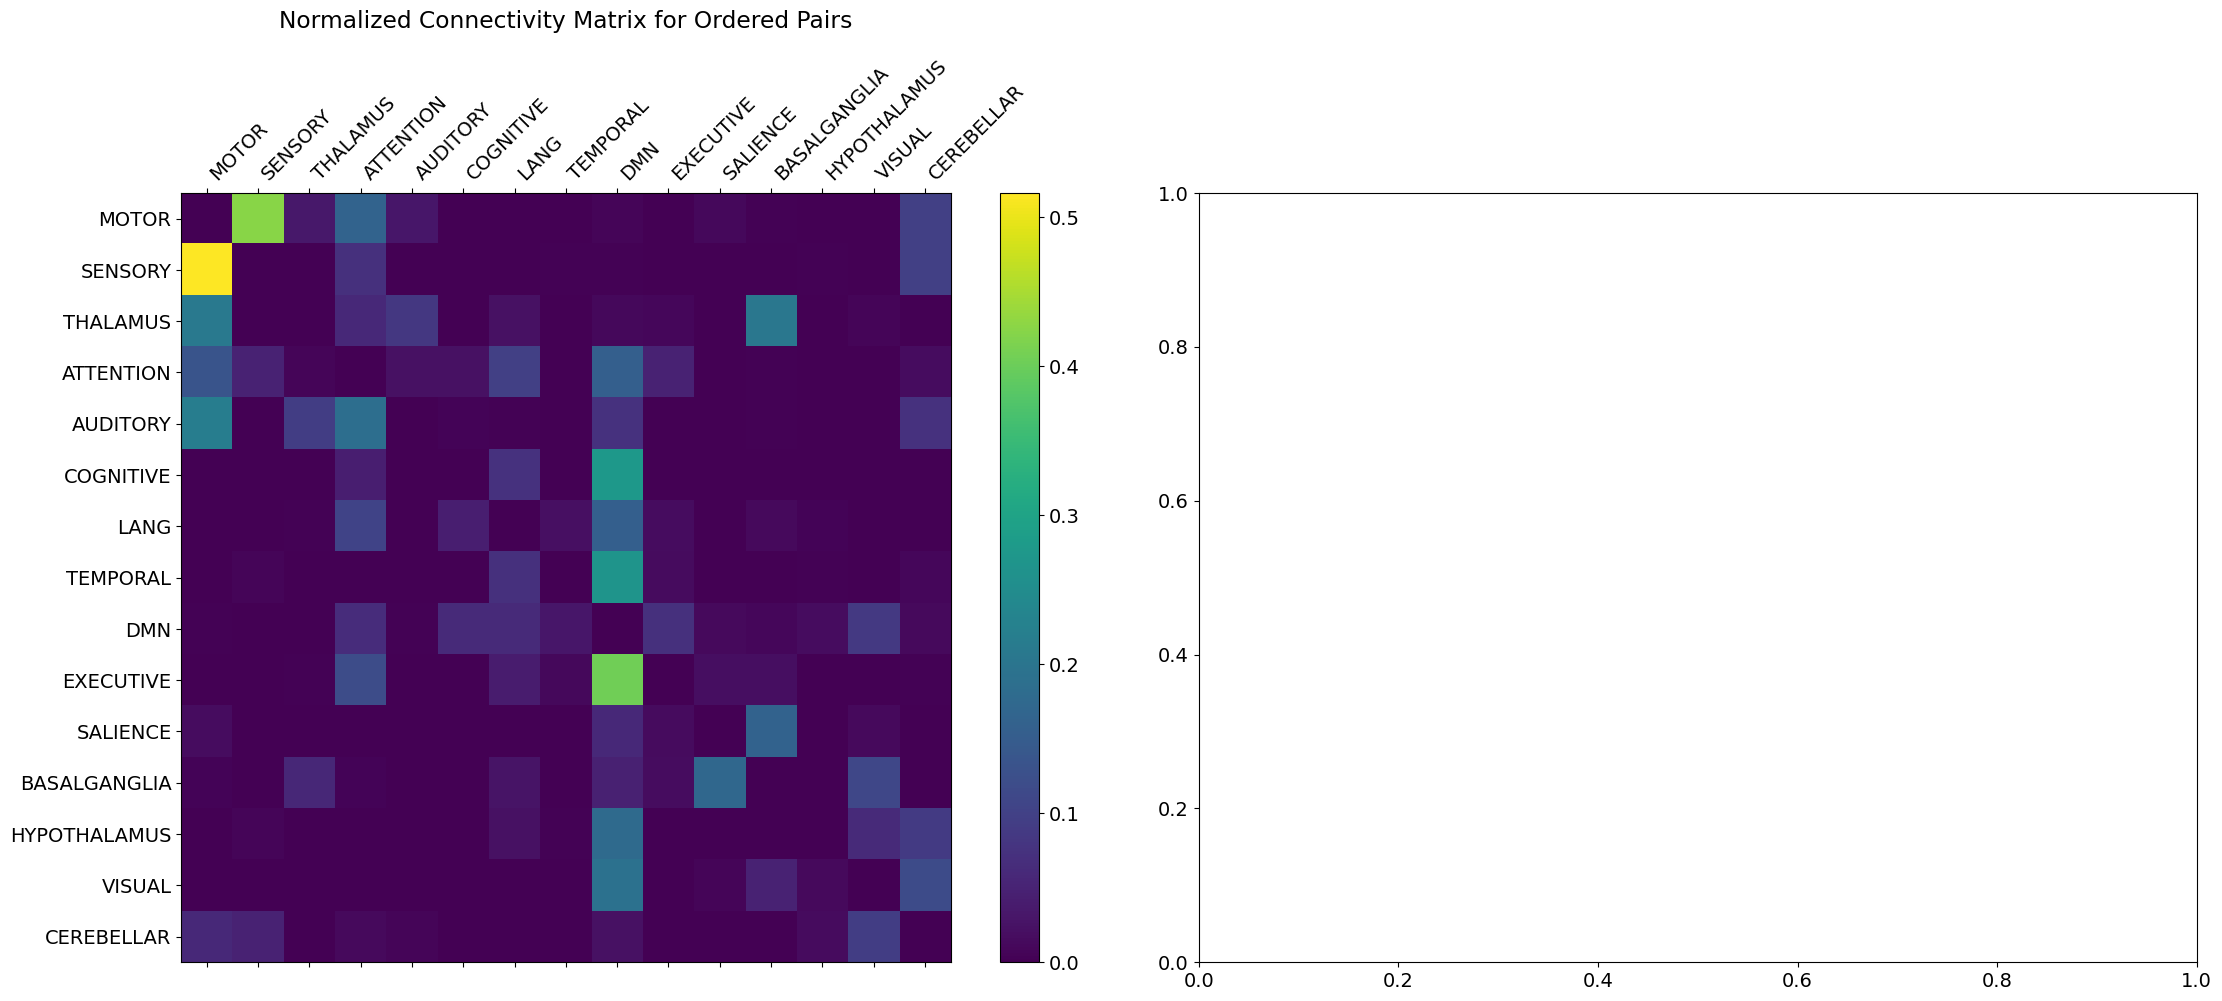

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#row only, SENT 10, epoch 171
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



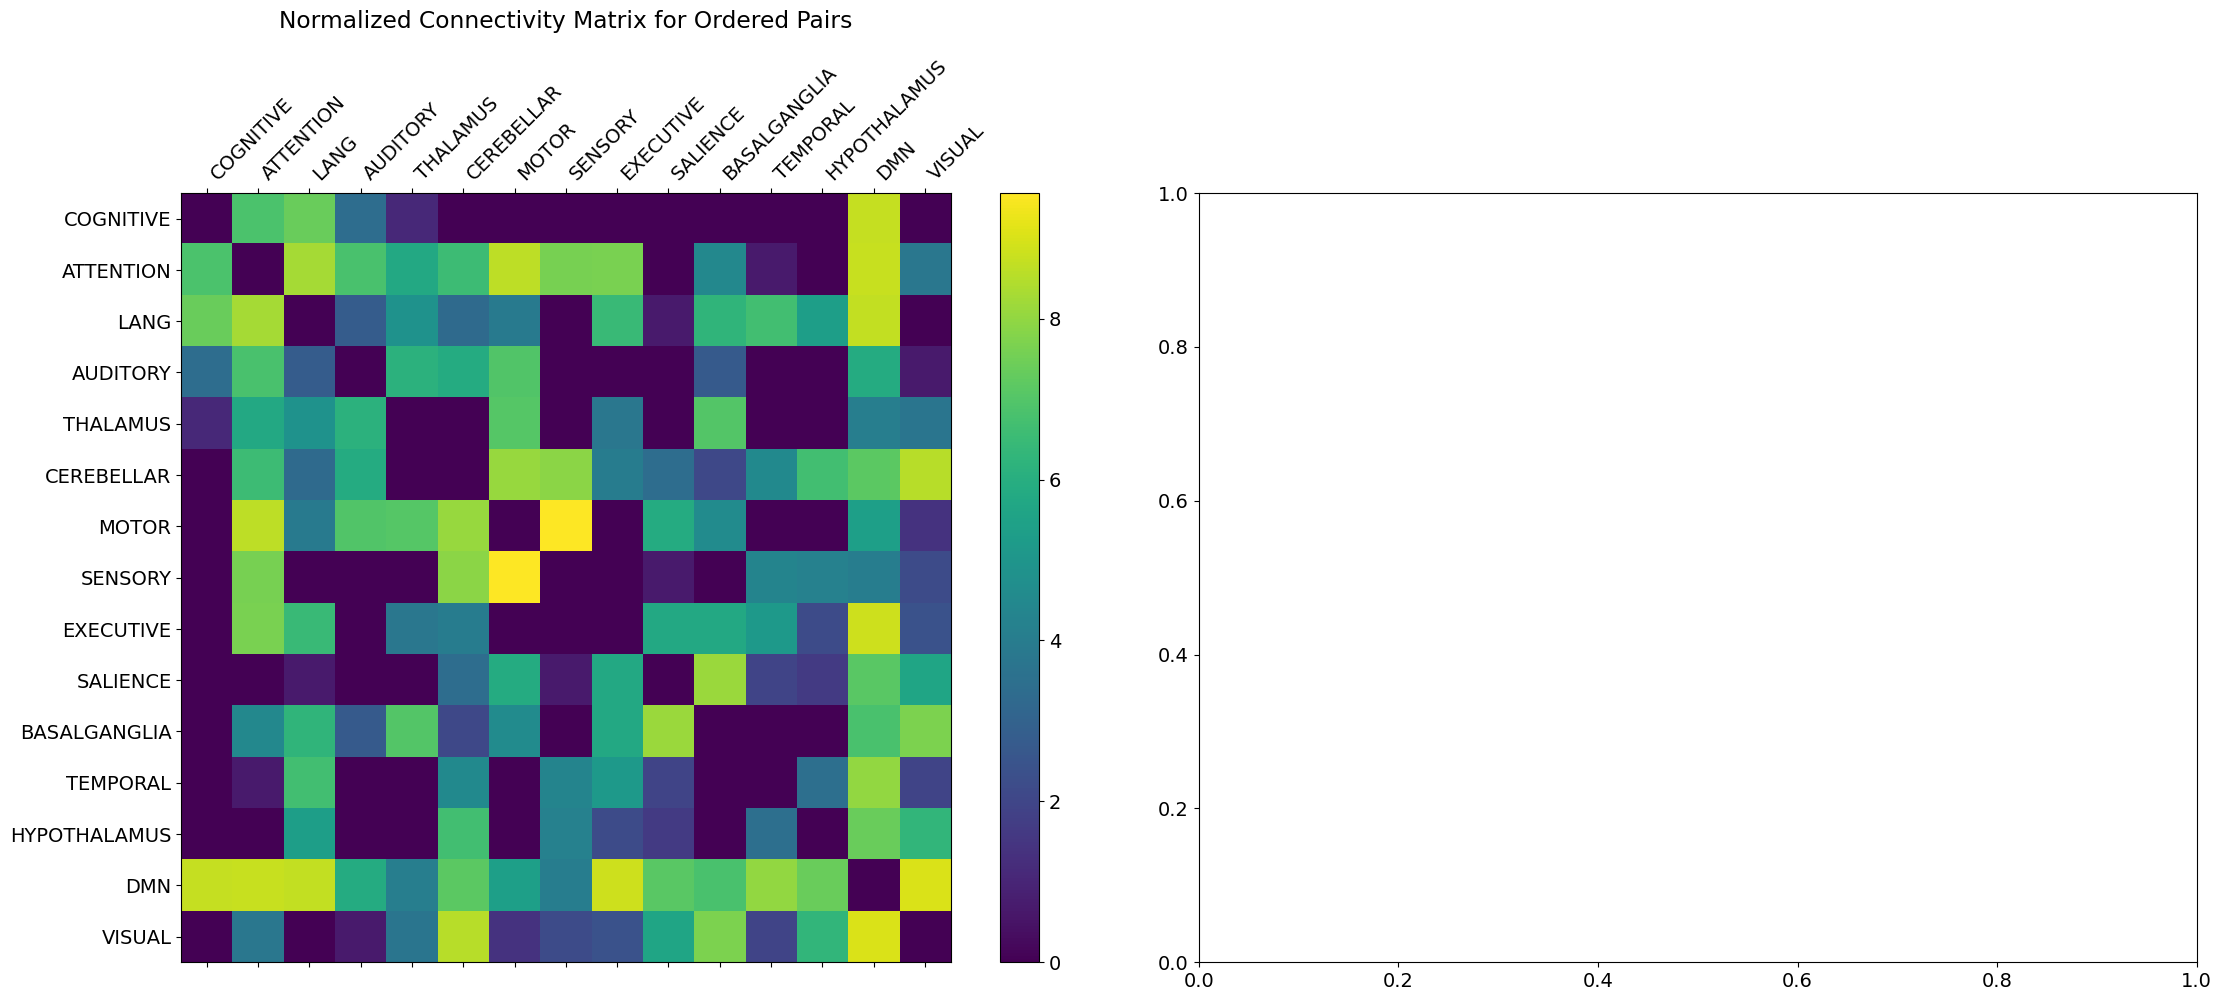

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#Log, SENT 10, epoch 171
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



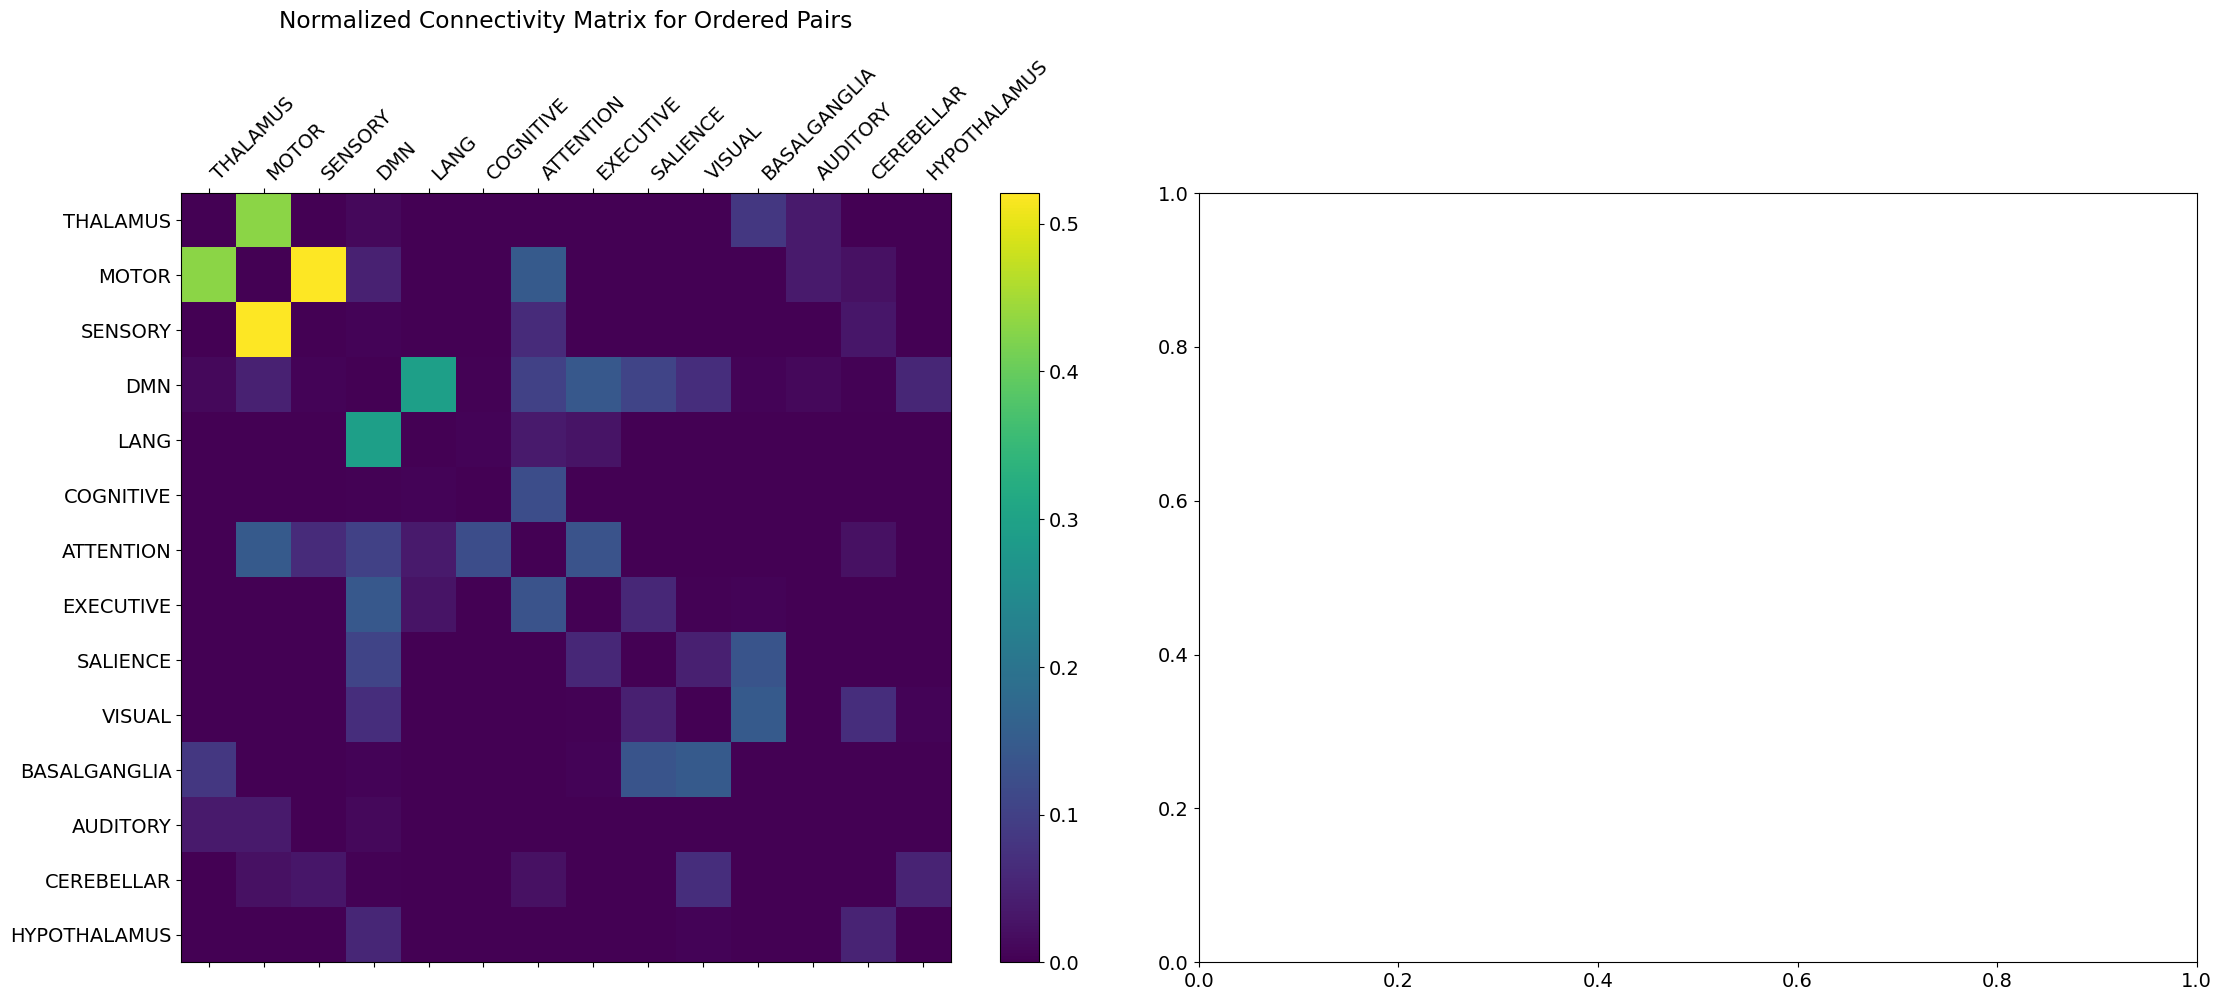

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#LOG, SENT 10
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



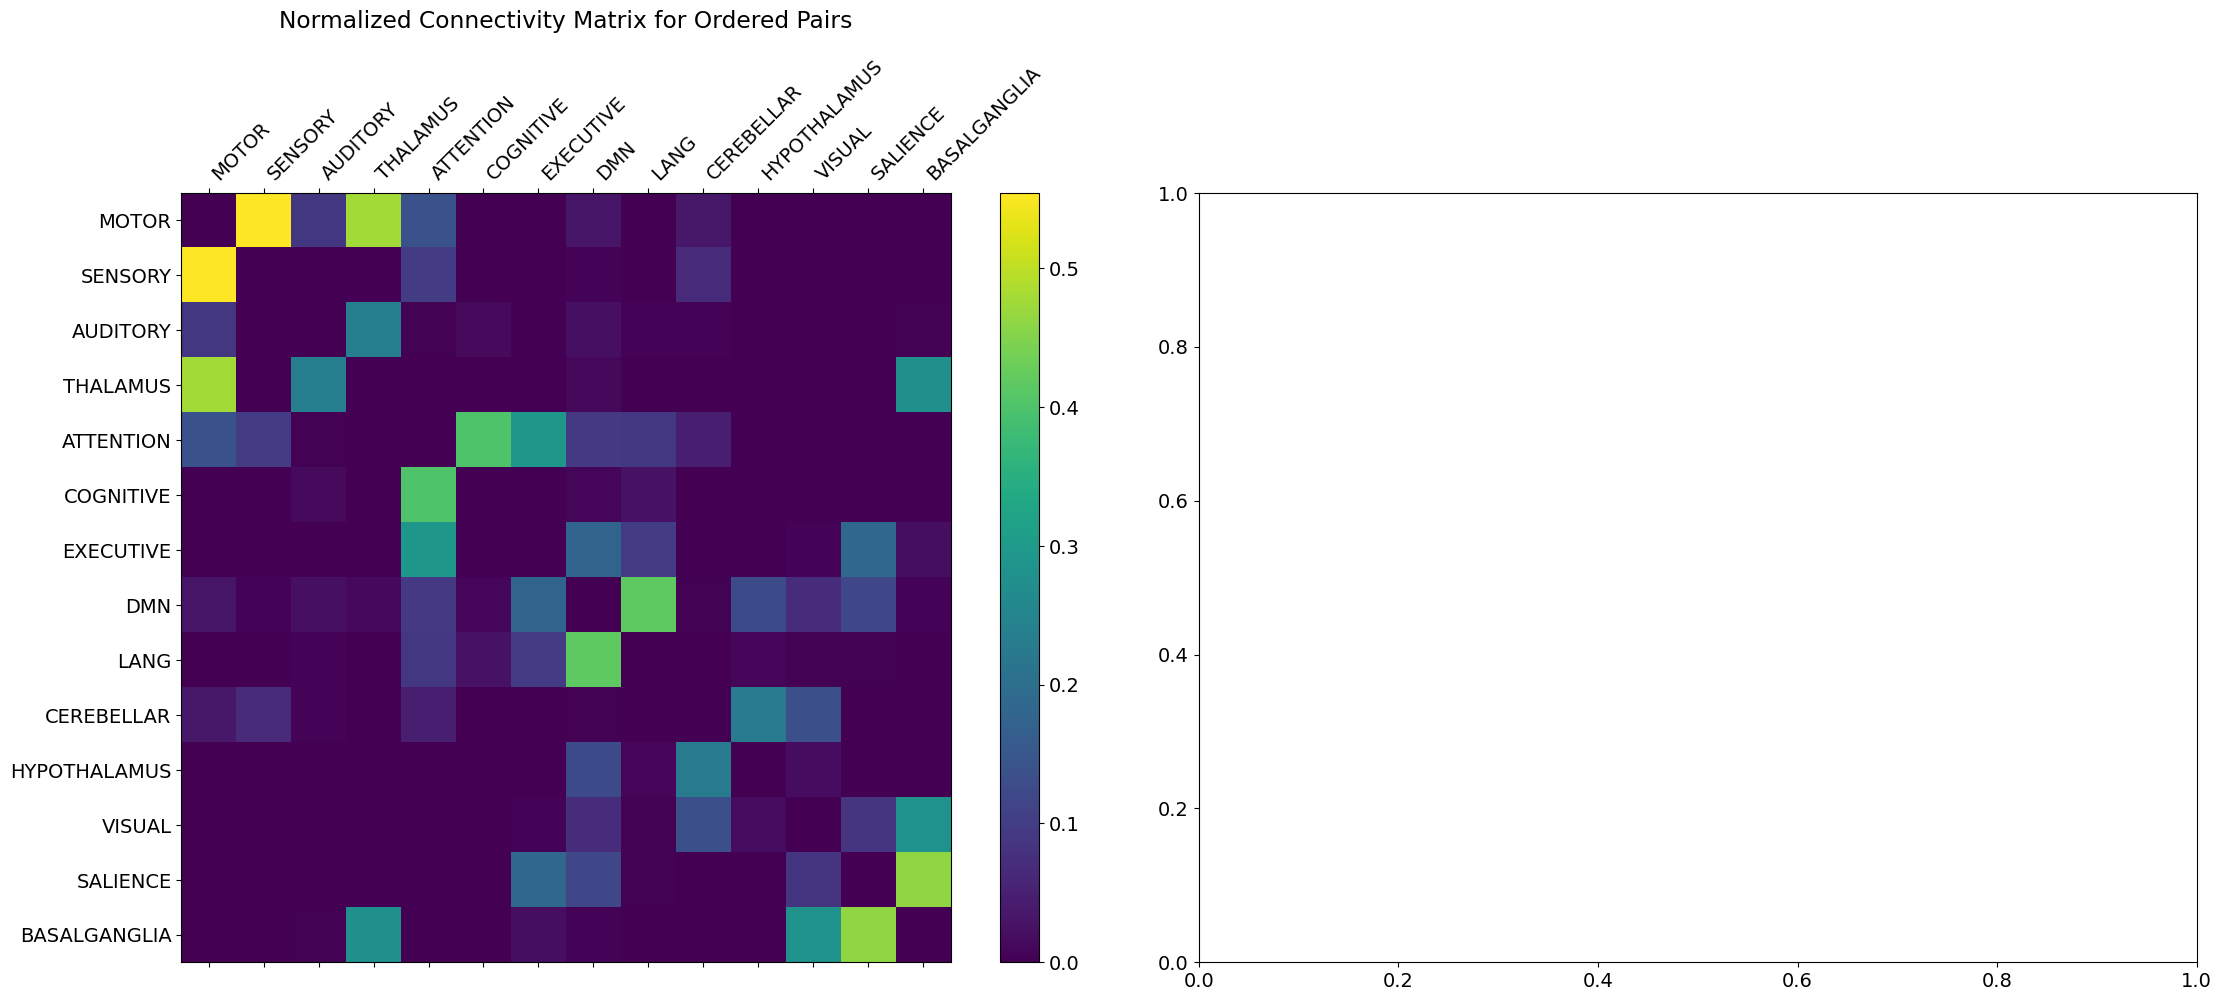

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#LOG, SENT 10
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



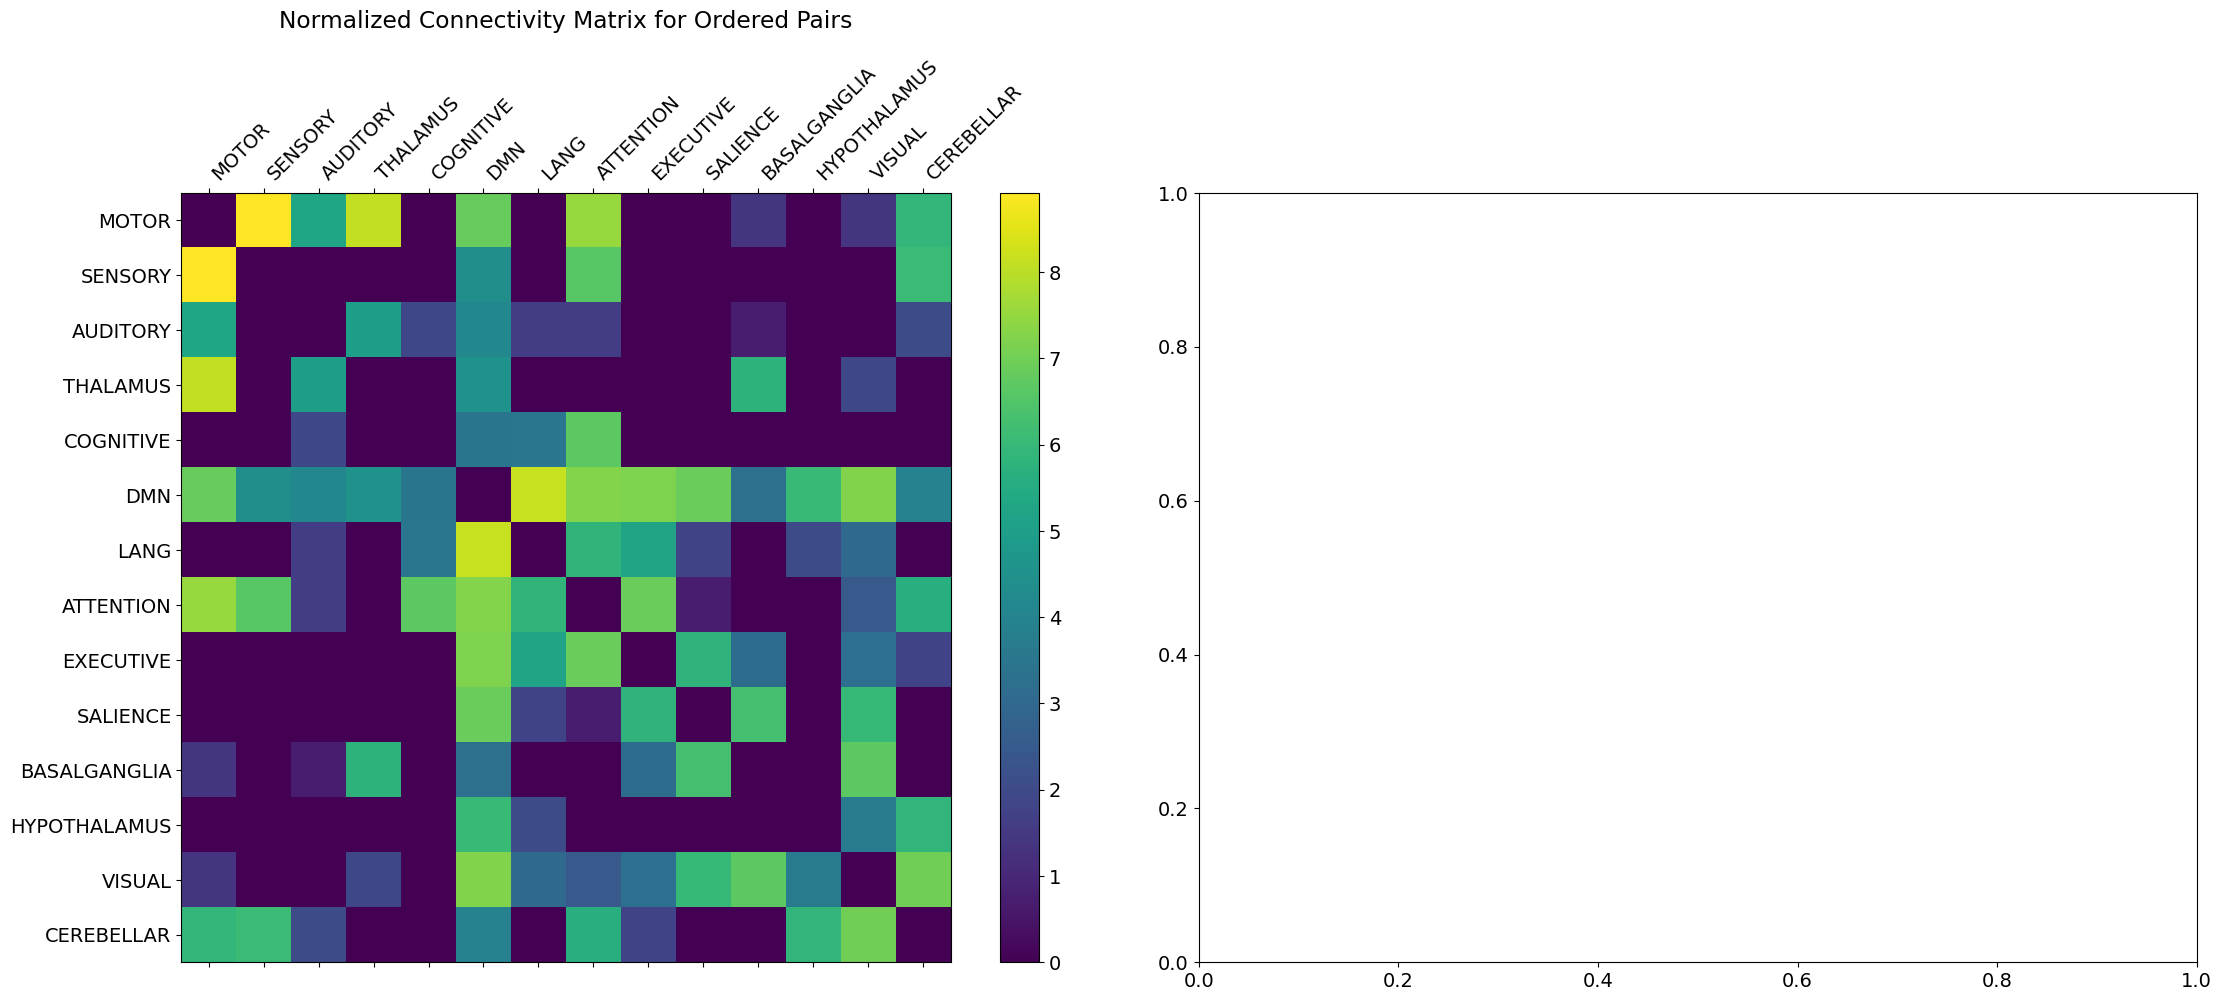

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#LOG, SENT 10
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



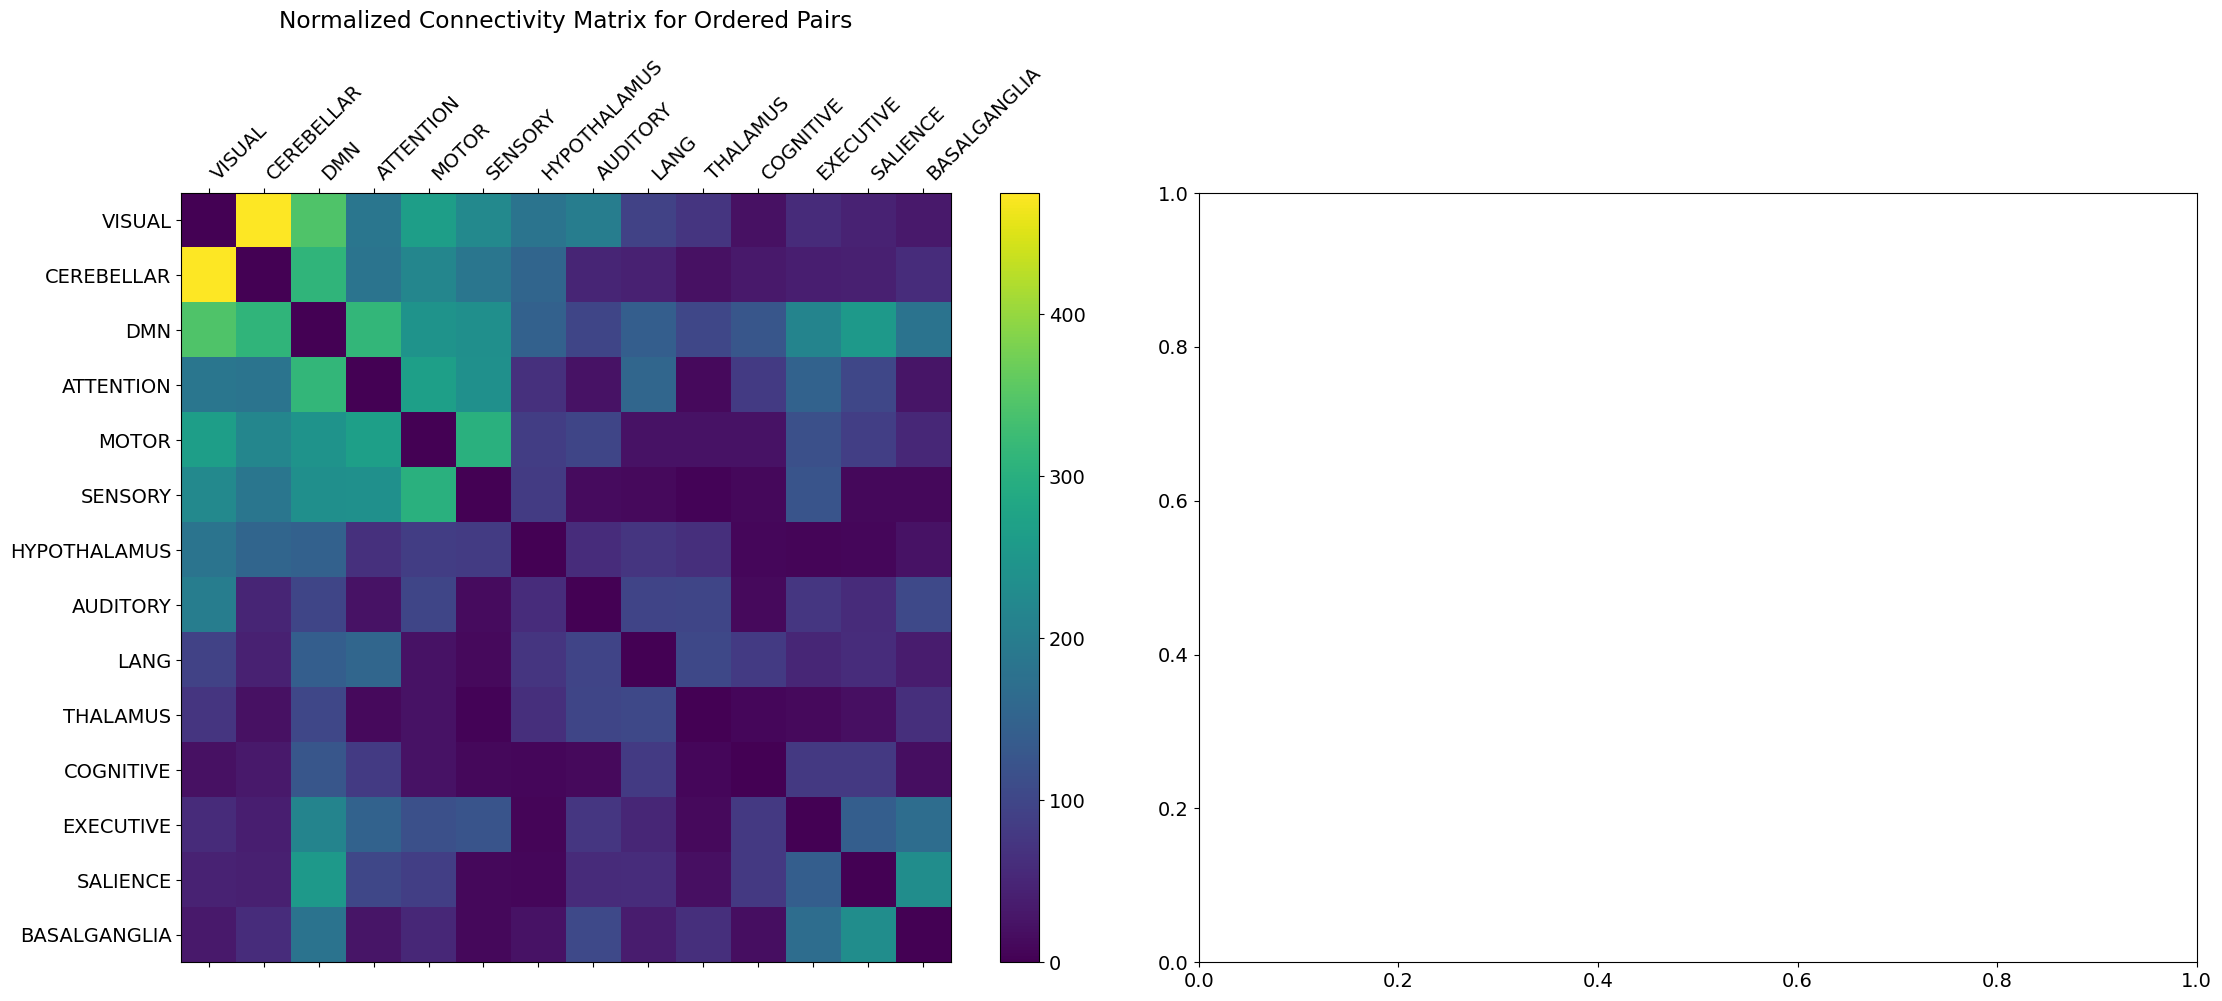

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#COMBINED SQRT NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



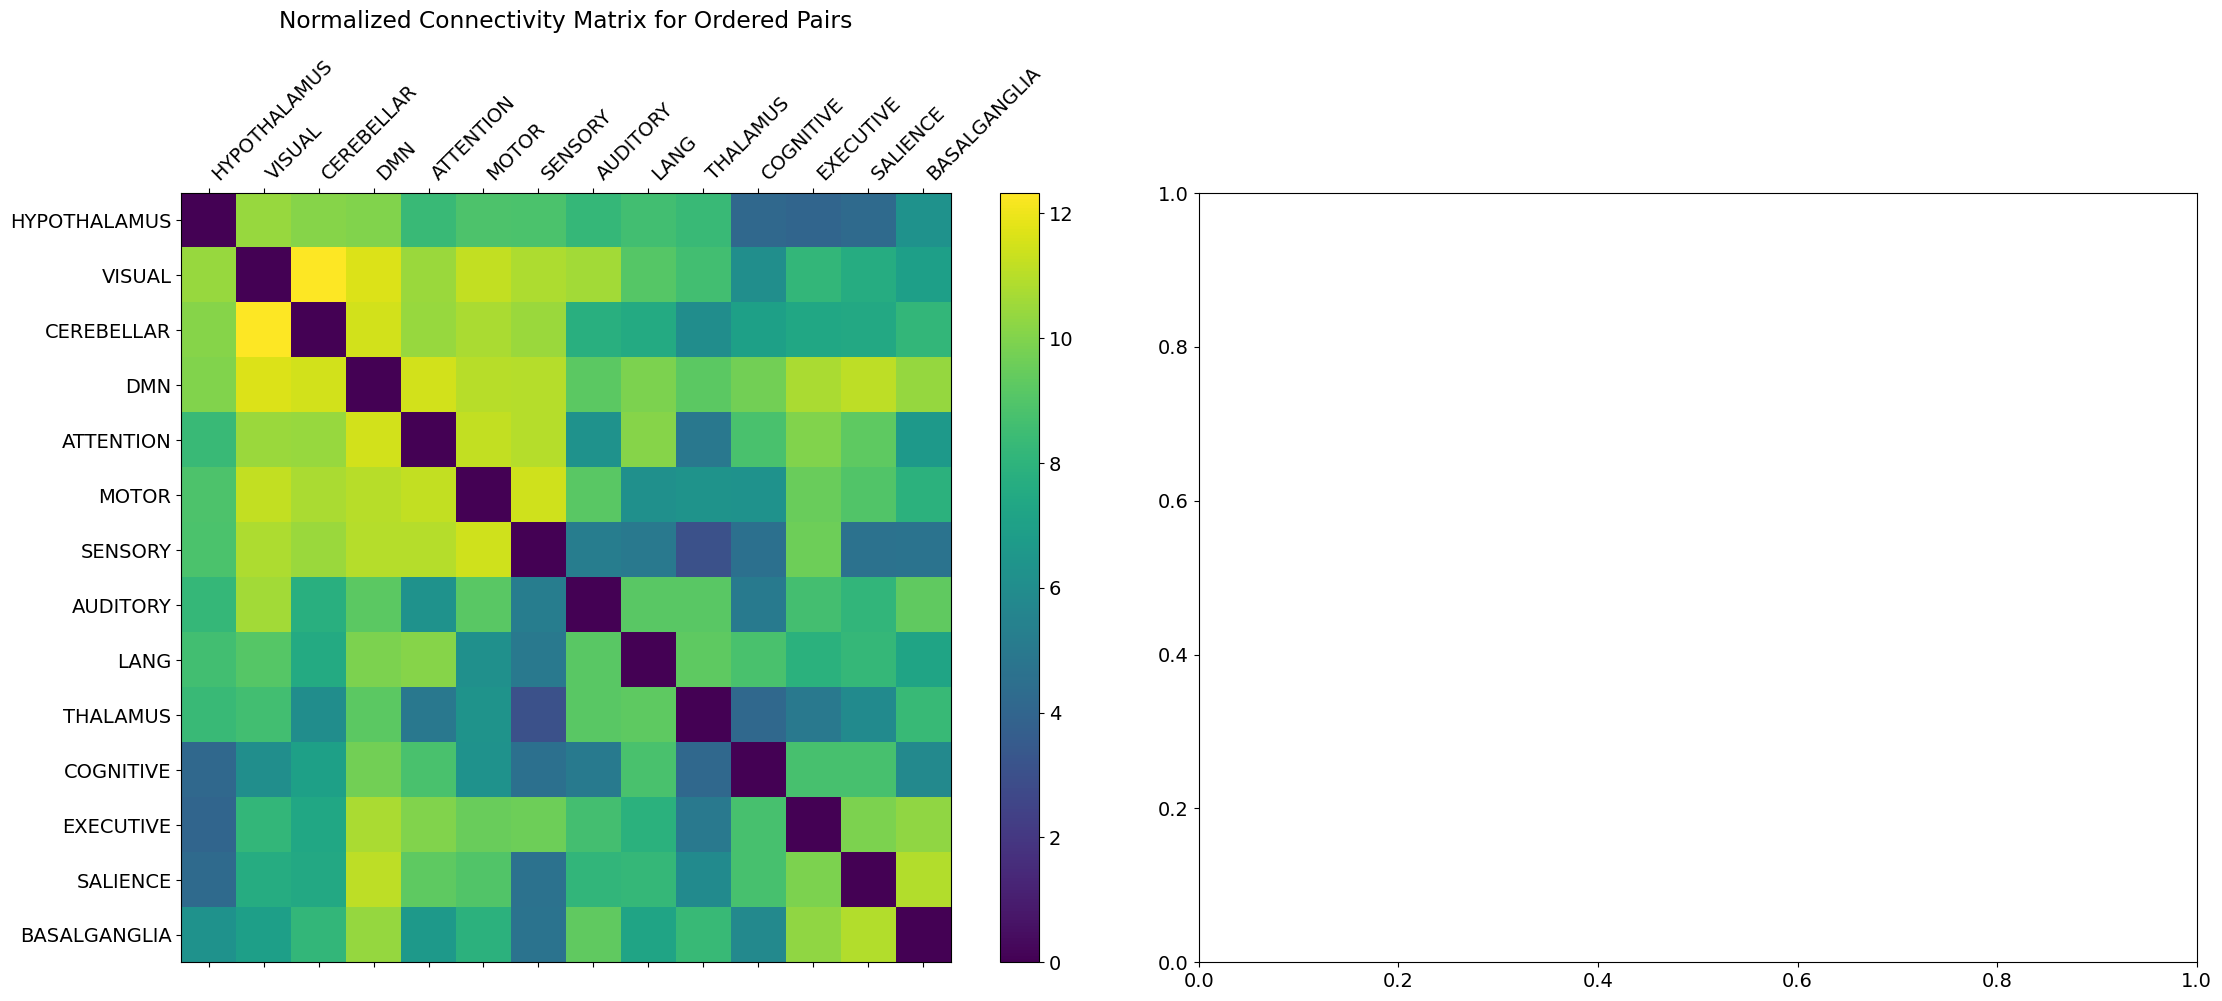

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#COMBINED LOG NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



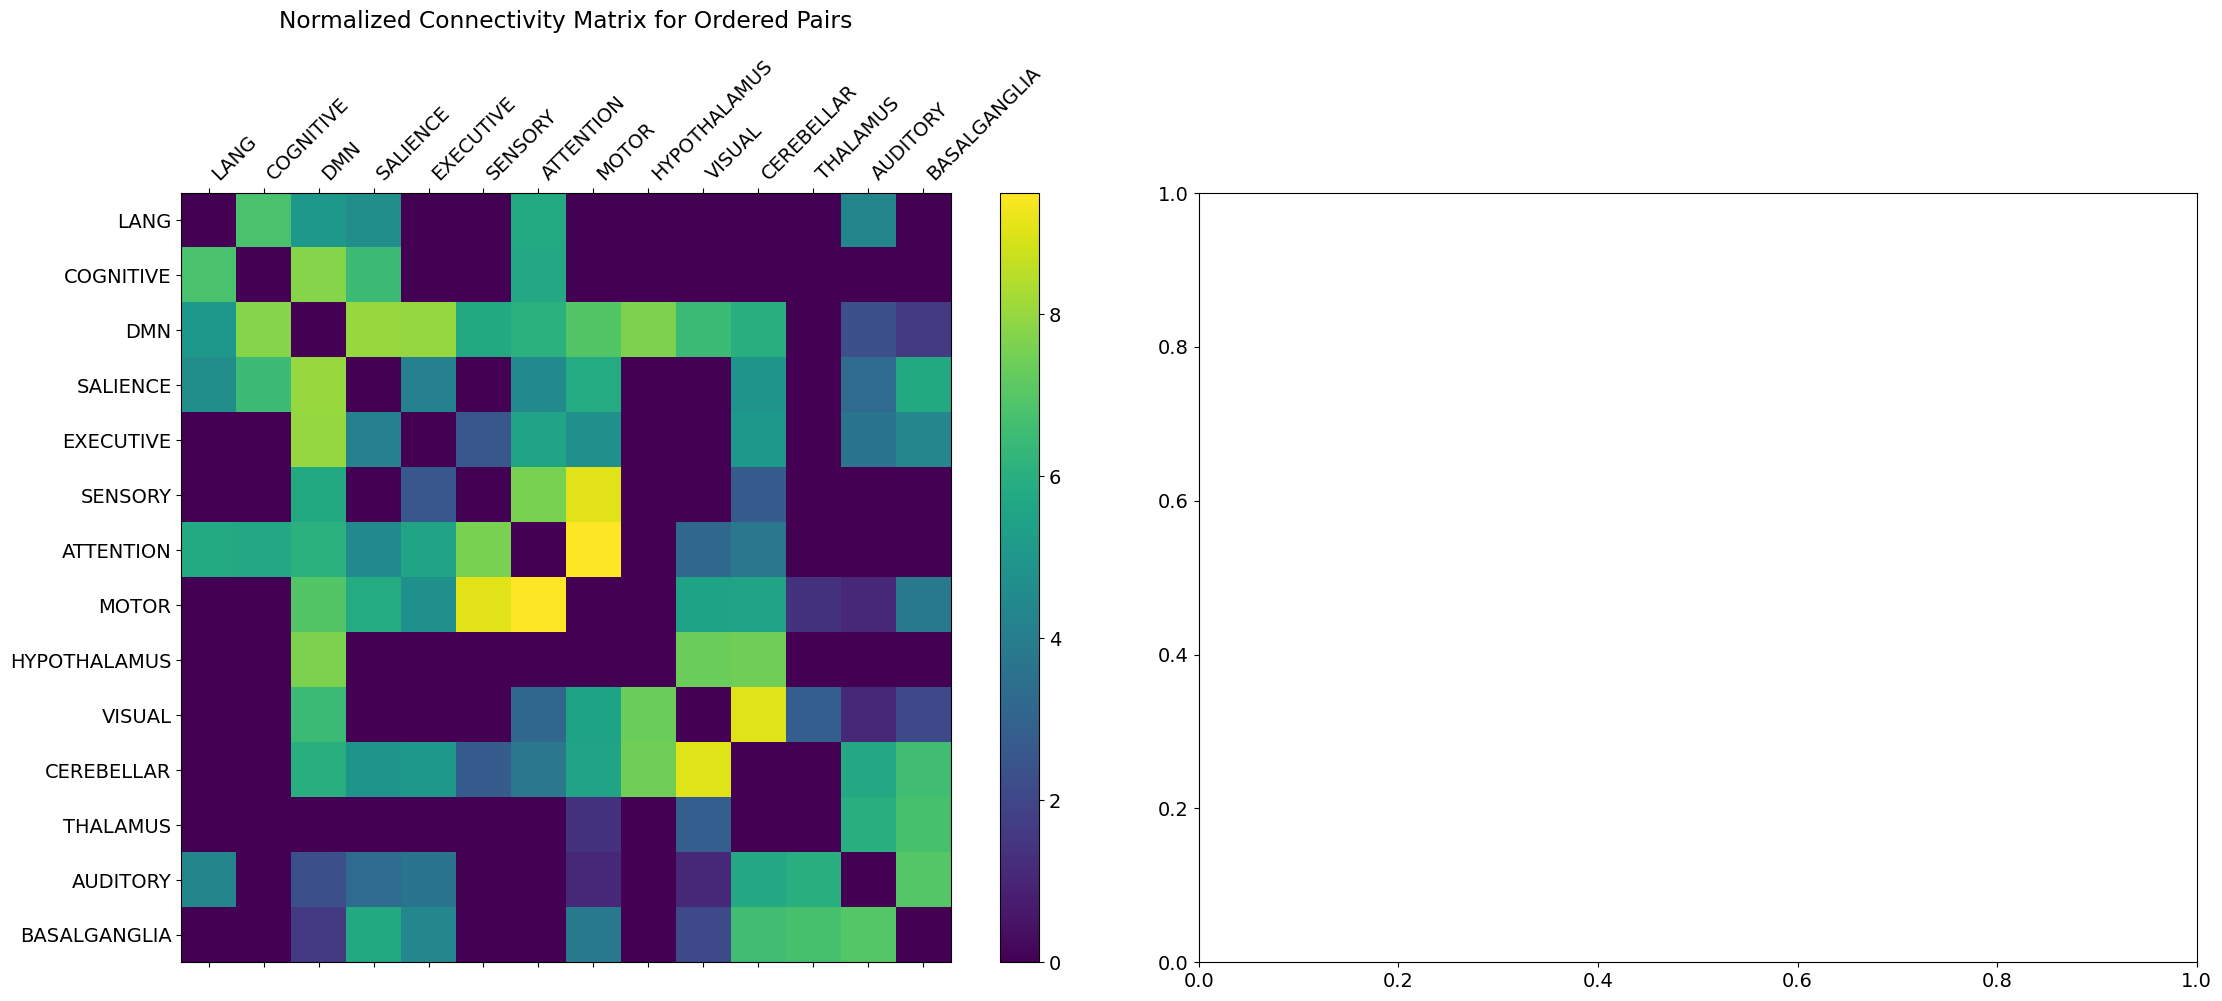

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#LOG NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



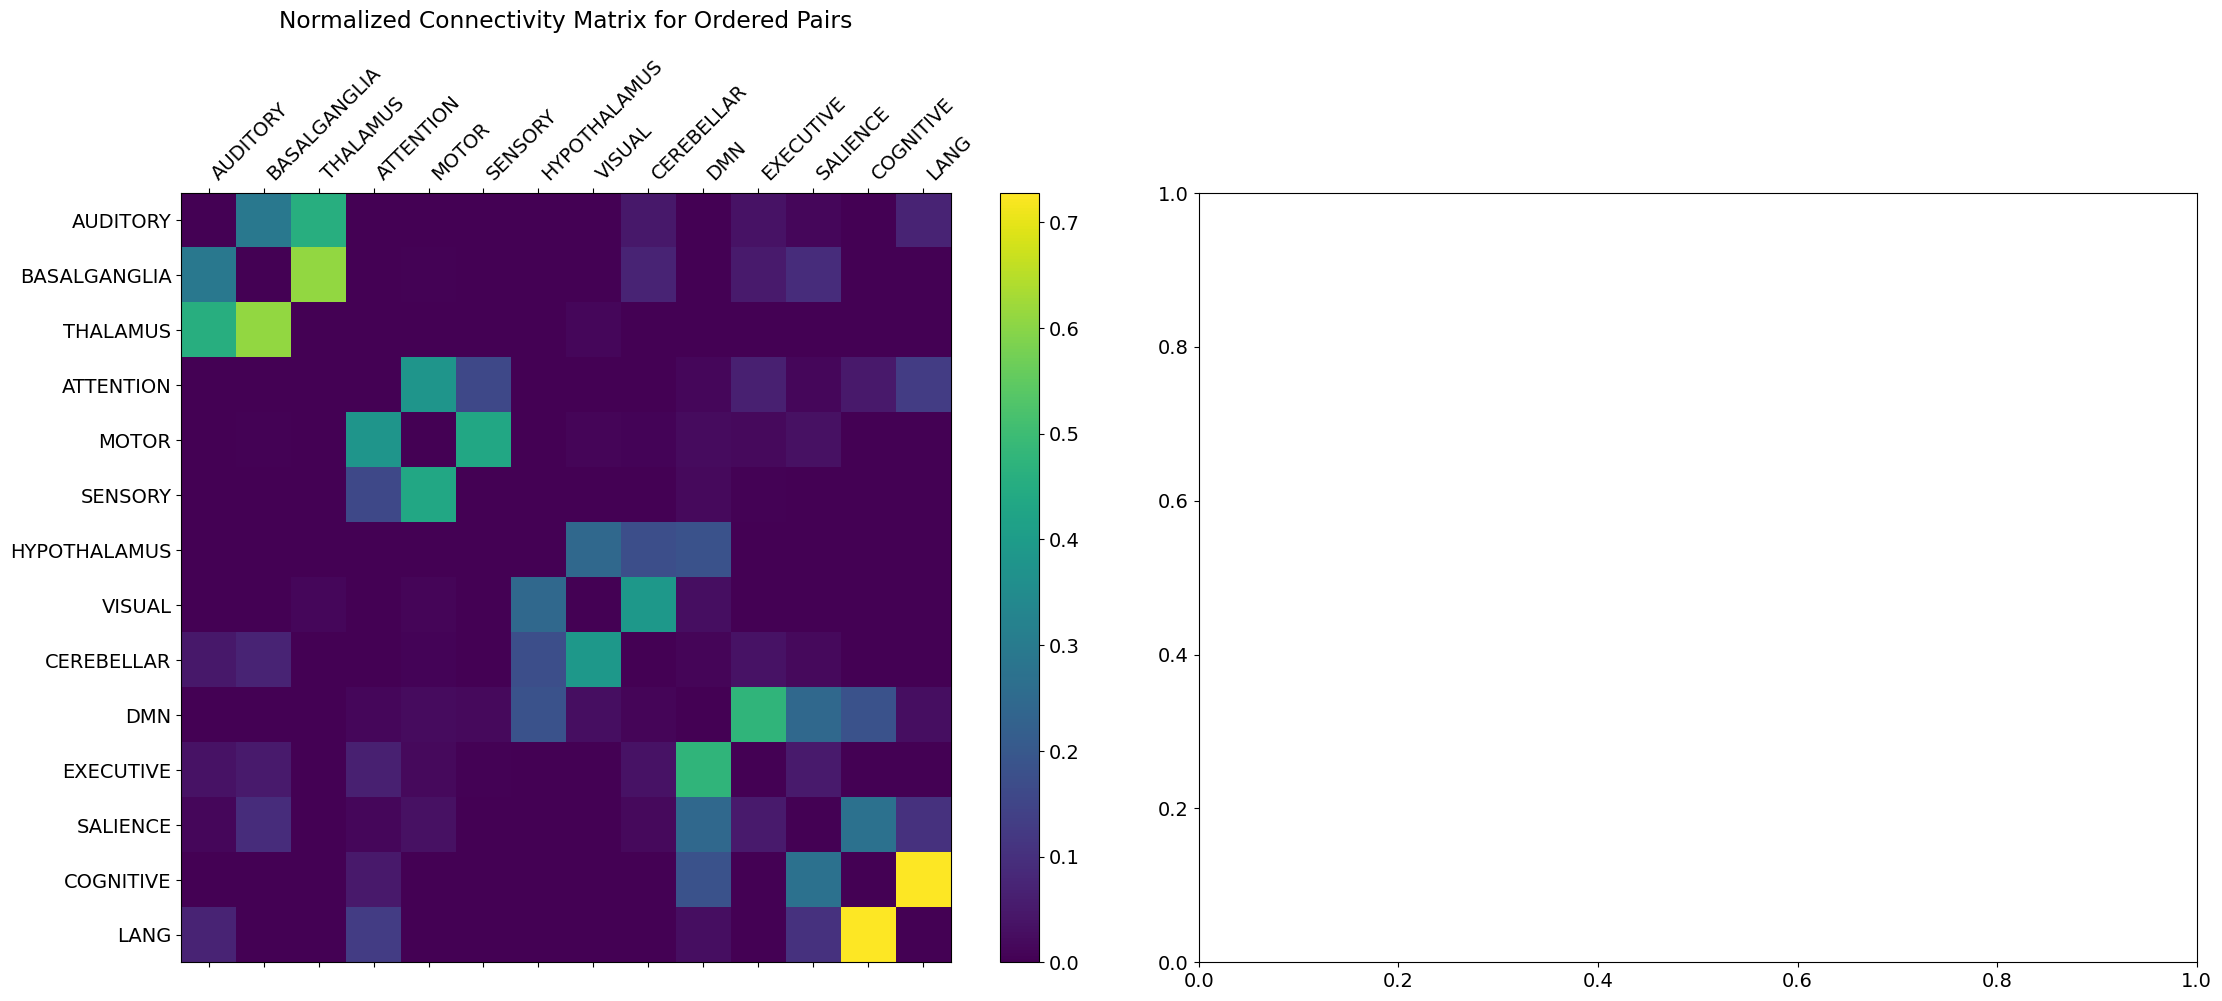

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#ROW and COLUMN NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



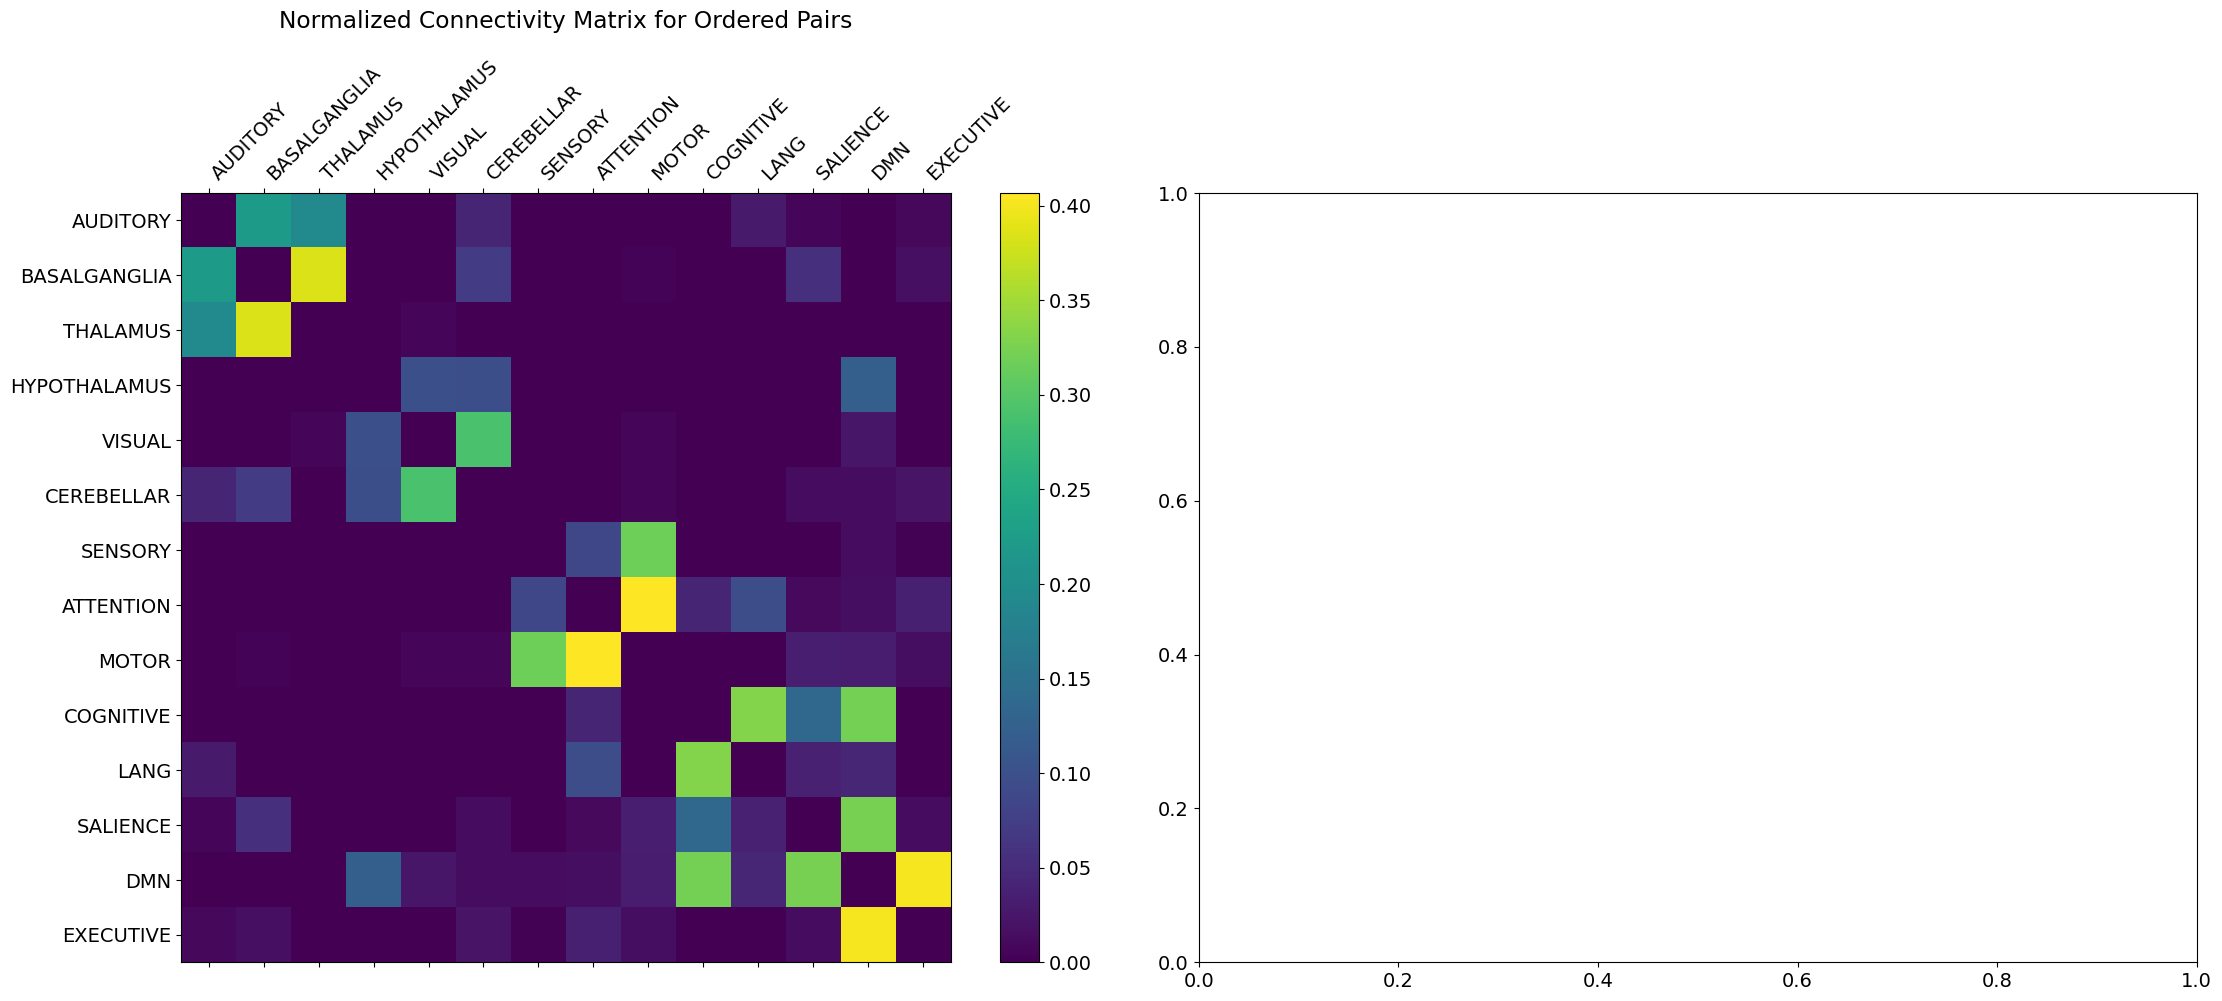

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#ROW NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()

